## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DATA SCIENCE ... PROJECT</p>

<a id="toc"></a>

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [INTRODUCTION](#0)
* [IMPORTING MODULES, LOADING DATA & DATA REVIEW](#1)
* [PREPROCESSING](#2)
* [EXPLORATORY DATA ANALYSIS (EDA)](#3)    
* [SCALING, CATEGORICAL VARIABLES, SPLITTING](#4)
* [MODELS](#5)
* [CONCLUSION](#6)

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 1.1 Information About the Project
This section provides an overview of the project, its objectives, and the expected outcomes. Students should clearly state the problem they are solving and the overall goal of the project, such as improving model performance or addressing a specific business problem.

**Objective:**  
Define the purpose of the project. Is it a classification, regression, or clustering task? Why is this problem important?

**Scope:**  
Clarify what the project will and won’t cover, emphasizing the importance of building a deployable model.

## 1.2 Description of the Dataset
Introduce the dataset selected for the project:

- **Source:** Mention the source of the dataset (e.g., Kaggle, UCI repository, government open data portals).
- **Size:** The number of records and columns.
- **Type:** Explain if it’s time series, tabular, text, or image data.

## 1.3 Description of the Columns
Provide an in-depth explanation of each feature in the dataset. Identify:

- **Target Variable:** What are you predicting (e.g., a binary or multiclass label, a continuous value)?
- **Feature Variables:** A brief description of the important columns, including their data types.

---



## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Modules, Load Data & Data Review</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
!pip install pandas==2.2.3
!pip install numpy==1.26.4
!pip install matplotlib==3.8.4
!pip install seaborn==0.13.2
!pip install missingno==0.5.2
!pip install scikit-learn==1.5.2
!pip install xgboost==2.1.2
!pip install lightgbm==4.5.0
!pip install catboost==1.2.7
!pip install imbalanced-learn==0.12.4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [3]:
df_main = pd.read_csv('Loan_Default.csv')
df = df_main.copy()
pd.set_option("display.max_columns", df.shape[-1]) 


In [4]:
df.sample(10)

ID  year loan_limit             Gender approv_in_adv loan_type  \
55308    80198  2019         cf              Joint         nopre     type1   
54555    79445  2019         cf  Sex Not Available         nopre     type1   
20989    45879  2019         cf              Joint         nopre     type1   
145967  170857  2019         cf  Sex Not Available         nopre     type1   
87999   112889  2019         cf              Joint         nopre     type1   
89125   114015  2019         cf               Male           pre     type3   
127975  152865  2019         cf               Male         nopre     type3   
79845   104735  2019         cf              Joint         nopre     type1   
7950     32840  2019         cf  Sex Not Available           pre     type1   
46247    71137  2019        ncf               Male         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
55308            p4                l1        nopc                  nob/c   
54555            p3                l1        nopc                  nob/c   
20989            p3                l1        nopc                  nob/c   
145967           p3                l1        nopc                  nob/c   
87999            p4                l1        nopc                  nob/c   
89125            p1                l1        nopc                  nob/c   
127975           p4                l1        nopc                  nob/c   
79845            p1                l1        nopc                  nob/c   
7950             p1                l1        nopc                  nob/c   
46247            p3                l1        nopc                  nob/c   

        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
55308        366500               NaN                   NaN              NaN   
54555        156500             4.990                0.7183          2944.38   
20989        506500             5.375                1.4316          3134.10   
145967       516500             3.750                0.0338             0.00   
87999        346500             3.250               -0.4813          1000.00   
89125        356500             4.750                0.3880          4862.50   
127975       286500             3.250               -0.5283             0.00   
79845        316500             4.500               -0.0368          6000.00   
7950         316500               NaN                   NaN              NaN   
46247        106500               NaN                   NaN              NaN   

         term Neg_ammortization interest_only lump_sum_payment  \
55308   360.0           not_neg      int_only         not_lpsm   
54555   360.0           neg_amm       not_int         not_lpsm   
20989   360.0           not_neg       not_int         not_lpsm   
145967  360.0           not_neg       not_int         not_lpsm   
87999   360.0           not_neg       not_int         not_lpsm   
89125   360.0           neg_amm       not_int         not_lpsm   
127975  360.0           not_neg       not_int         not_lpsm   
79845   360.0           neg_amm       not_int         not_lpsm   
7950    360.0           not_neg       not_int         not_lpsm   
46247   180.0           not_neg       not_int         not_lpsm   

        property_value construction_type occupancy_type Secured_by  \
55308         538000.0                sb             pr       home   
54555         208000.0                sb             pr       home   
20989         668000.0                sb             pr       home   
145967        808000.0                sb             pr       home   
87999        1008000.0                sb             pr       home   
89125         398000.0                sb             pr       home   
127975        308000.0                sb             pr       home   
79845         398000.0                sb             pr       home   
7950               NaN                sb             pr       home   
46247   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.shape

(148670, 34)

In [7]:
df.describe(include='all')

ID      year loan_limit  Gender approv_in_adv loan_type  \
count   148670.000000  148670.0     145326  148670        147762    148670   
unique            NaN       NaN          2       4             2         3   
top               NaN       NaN         cf    Male         nopre     type1   
freq              NaN       NaN     135348   42346        124621    113173   
mean     99224.500000    2019.0        NaN     NaN           NaN       NaN   
std      42917.476598       0.0        NaN     NaN           NaN       NaN   
min      24890.000000    2019.0        NaN     NaN           NaN       NaN   
25%      62057.250000    2019.0        NaN     NaN           NaN       NaN   
50%      99224.500000    2019.0        NaN     NaN           NaN       NaN   
75%     136391.750000    2019.0        NaN     NaN           NaN       NaN   
max     173559.000000    2019.0        NaN     NaN           NaN       NaN   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
count        148536            148670      148670                 148670   
unique            4                 2           2                      2   
top              p3                l1        nopc                  nob/c   
freq          55934            142344      148114                 127908   
mean            NaN               NaN         NaN                    NaN   
std             NaN               NaN         NaN                    NaN   
min             NaN               NaN         NaN                    NaN   
25%             NaN               NaN         NaN                    NaN   
50%             NaN               NaN         NaN                    NaN   
75%             NaN               NaN         NaN                    NaN   
max             NaN               NaN         NaN                    NaN   

         loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count   1.486700e+05     112231.000000         112031.000000    109028.000000   
unique           NaN               NaN                   NaN              NaN   
top              NaN               NaN                   NaN              NaN   
freq             NaN               NaN                   NaN              NaN   
mean    3.311177e+05          4.045476              0.441656      3224.996127   
std     1.839093e+05          0.561391              0.513043      3251.121510   
min     1.650000e+04          0.000000             -3.638000         0.000000   
25%     1.965000e+05          3.625000              0.076000       581.490000   
50%     2.965000e+05          3.990000              0.390400      2596.450000   
75%     4.365000e+05          4.375000              0.775400      4812.500000   
max     3.576500e+06          8.000000              3.357000     60000.000000   

                 term Neg_ammortization interest_only lump_sum_payment  \
count   148629.000000            148549        148670           148670   
unique            NaN                 2             2                2   
top               NaN           not_neg       not_int         not_lpsm   
freq              NaN            133420        141560           145286   
mean       335.136582               NaN           NaN              NaN   
std         58.409084               NaN           NaN              NaN   
min         96.000000               NaN           NaN              NaN   
25%        360.000000               NaN           NaN              NaN   
50%        360.000000               NaN           NaN              NaN   
75%        360.000000               NaN           NaN              NaN   
max        360.000000               NaN           NaN              NaN   

        property_value construction_type occupancy_type Secured_by  \
count     1.335720e+05            148670         148670     148670   
unique             NaN                 2              3          2   
top                NaN                sb             pr       home   
freq               NaN     

In [8]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Preprocessing</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 2.1 Data Cleaning
Cleaning the dataset is critical before any analysis. Describe any issues encountered, such as:

- **Duplicates:** Remove duplicate records.
- **Inconsistent Formats:** Address inconsistent data formats (e.g., date formats, string casing).
- **Incorrect Data:** Handle obvious data errors (e.g., negative ages or future dates).


In [9]:
willremove = []

In [10]:
df["ID"].sample(10)

9525       34415
104464    129354
129597    154487
69705      94595
145247    170137
5819       30709
113704    138594
87133     112023
68980      93870
91245     116135
Name: ID, dtype: int64

In [11]:
df["ID"].nunique(),df.shape[0]

(148670, 148670)

In [12]:
willremove.append("ID")

In [13]:
df["year"].sample(10)

46972     2019
55907     2019
56362     2019
540       2019
107426    2019
41859     2019
146068    2019
83619     2019
137424    2019
95117     2019
Name: year, dtype: int64

In [14]:
df["year"].describe()

count    148670.0
mean       2019.0
std           0.0
min        2019.0
25%        2019.0
50%        2019.0
75%        2019.0
max        2019.0
Name: year, dtype: float64

In [15]:
willremove.append("year")

In [16]:
df["loan_limit"].sample(10) 

140863    cf
47607     cf
141405    cf
73966     cf
579       cf
66146     cf
6028      cf
117828    cf
90919     cf
41012     cf
Name: loan_limit, dtype: object

In [17]:
df["loan_limit"].value_counts(dropna=False)

loan_limit
cf     135348
ncf      9978
NaN      3344
Name: count, dtype: int64

In [18]:
willremove.append("loan_limit")

In [19]:
df["Gender"].sample(10)

31960                  Male
144219    Sex Not Available
84319                  Male
106223    Sex Not Available
31080                Female
22434     Sex Not Available
38111     Sex Not Available
39758                  Male
92817     Sex Not Available
30757                 Joint
Name: Gender, dtype: object

In [20]:
df["Gender"].value_counts(dropna=False) , df["Gender"].isnull().sum()

(Gender
 Male                 42346
 Joint                41399
 Sex Not Available    37659
 Female               27266
 Name: count, dtype: int64,
 0)

In [21]:
df[df["Gender"]=="Sex Not Available"].sample(3)

ID  year loan_limit             Gender approv_in_adv loan_type  \
98635  123525  2019         cf  Sex Not Available         nopre     type1   
90103  114993  2019         cf  Sex Not Available         nopre     type2   
44396   69286  2019         cf  Sex Not Available         nopre     type3   

      loan_purpose Credit_Worthiness open_credit business_or_commercial  \
98635           p1                l1        nopc                  nob/c   
90103           p1                l1        nopc                    b/c   
44396           p4                l1        nopc                  nob/c   

       loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
98635       206500             3.625               -0.1994           598.08   
90103       106500             4.375                1.1309          2171.02   
44396       406500             3.250                0.1430          2262.29   

        term Neg_ammortization interest_only lump_sum_payment  property_value  \
98635  180.0           not_neg       not_int         not_lpsm        338000.0   
90103  360.0           not_neg       not_int         not_lpsm        108000.0   
44396  180.0           not_neg       not_int         not_lpsm        578000.0   

      construction_type occupancy_type Secured_by total_units  income  \
98635                sb             pr       home          1U  6540.0   
90103                sb             pr       home          1U  4620.0   
44396                sb             pr       home          1U     NaN   

      credit_type  Credit_Score co-applicant_credit_type    age  \
98635        CRIF           755                      EXP  25-34   
90103         CIB           873                      EXP  25-34   
44396         EXP           546                      CIB  55-64   

      submission_of_application        LTV Region Security_Type  Status  dtir1  
98635                  not_inst  61.094675  south        direct       0   30.0  
90103                   to_inst  98.611111  south        direct       0   33.0  
44396                   to_inst  70.328720  south        direct       0    NaN

In [22]:
df.loc[df["Gender"] == "Sex Not Available", "Gender"] = np.nan

In [23]:
df["Gender"].value_counts(dropna=False), df["Gender"].isnull().sum()

(Gender
 Male      42346
 Joint     41399
 NaN       37659
 Female    27266
 Name: count, dtype: int64,
 37659)

In [24]:
willremove.append("Gender")

In [25]:
df["approv_in_adv"].sample(10)

62413     nopre
89071     nopre
60992       pre
45125       pre
137794      pre
64563     nopre
24932     nopre
60310     nopre
131690    nopre
120059    nopre
Name: approv_in_adv, dtype: object

In [26]:
df["approv_in_adv"].value_counts(dropna=False)

approv_in_adv
nopre    124621
pre       23141
NaN         908
Name: count, dtype: int64

In [27]:
willremove.append("approv_in_adv")

In [28]:
df["loan_type"].sample(10)

136594    type1
69937     type3
106381    type2
131283    type1
23061     type1
96872     type1
80693     type3
35779     type3
2649      type1
19118     type1
Name: loan_type, dtype: object

In [29]:
df["loan_type"].value_counts(dropna=False)

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

In [30]:
willremove.append("loan_type")

In [31]:
df["loan_purpose"].sample(10)

142551    p1
3938      p1
74494     p3
28473     p4
76634     p1
140520    p3
64520     p4
58686     p1
76252     p4
41641     p2
Name: loan_purpose, dtype: object

In [32]:
df["loan_purpose"].value_counts(dropna=False)

loan_purpose
p3     55934
p4     54799
p1     34529
p2      3274
NaN      134
Name: count, dtype: int64

In [33]:
willremove.append("loan_purpose")

In [34]:
df["Credit_Worthiness"].sample(10)

123036    l1
68928     l1
134268    l1
86546     l1
123964    l1
29240     l2
58649     l1
105884    l1
66718     l1
115767    l1
Name: Credit_Worthiness, dtype: object

In [35]:
df["Credit_Worthiness"].value_counts(dropna=False)

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

In [36]:
willremove.append("Credit_Worthiness")

In [37]:
df["open_credit"].sample(10)

24179     nopc
73431     nopc
97132     nopc
57479     nopc
86534     nopc
115032    nopc
3758      nopc
94575     nopc
97517     nopc
106873    nopc
Name: open_credit, dtype: object

In [38]:
df["open_credit"].value_counts(dropna=False)

open_credit
nopc    148114
opc        556
Name: count, dtype: int64

In [39]:
willremove.append("open_credit")

In [40]:
df["business_or_commercial"].sample(10)

7655      nob/c
8876      nob/c
29012     nob/c
24788       b/c
128516    nob/c
79580     nob/c
130065    nob/c
145695    nob/c
1919      nob/c
125900      b/c
Name: business_or_commercial, dtype: object

In [41]:
df["business_or_commercial"].value_counts(dropna=False)

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64

In [42]:
willremove.append("business_or_commercial")

In [43]:
df["loan_amount"].sample(10)

101455    116500
133207    366500
15632      86500
131509     86500
18824     686500
120552    606500
101463    206500
114469    156500
144217    286500
101099    406500
Name: loan_amount, dtype: int64

In [44]:
df["loan_amount"].describe(),df["loan_amount"].isnull().sum()

(count    1.486700e+05
 mean     3.311177e+05
 std      1.839093e+05
 min      1.650000e+04
 25%      1.965000e+05
 50%      2.965000e+05
 75%      4.365000e+05
 max      3.576500e+06
 Name: loan_amount, dtype: float64,
 0)

In [45]:
df["rate_of_interest"].sample(10)

119360    4.750
147390    3.875
17743     3.250
139678    3.625
106576    3.750
54389       NaN
92870     3.990
136431    3.875
95836     3.750
19318       NaN
Name: rate_of_interest, dtype: float64

In [46]:
df["rate_of_interest"].describe(),df["rate_of_interest"].isnull().sum()

(count    112231.000000
 mean          4.045476
 std           0.561391
 min           0.000000
 25%           3.625000
 50%           3.990000
 75%           4.375000
 max           8.000000
 Name: rate_of_interest, dtype: float64,
 36439)

In [47]:
willremove.append("rate_of_interest")

In [48]:
df["Interest_rate_spread"].sample(10)

59594        NaN
81069     1.4847
102976    0.1576
58440        NaN
91139     0.4296
44046        NaN
100235    1.6735
78524        NaN
58284     1.2028
87056     0.8528
Name: Interest_rate_spread, dtype: float64

In [49]:
df["Interest_rate_spread"].describe(),df["Interest_rate_spread"].isnull().sum()

(count    112031.000000
 mean          0.441656
 std           0.513043
 min          -3.638000
 25%           0.076000
 50%           0.390400
 75%           0.775400
 max           3.357000
 Name: Interest_rate_spread, dtype: float64,
 36639)

In [50]:
willremove.append("Interest_rate_spread")

In [51]:
df["Upfront_charges"].sample(10)

144082     3306.98
2850       3979.78
144627     3907.40
147196    12408.50
48880      1845.00
93568         0.00
77563       382.65
125430     2955.00
100243        0.00
3097       9062.50
Name: Upfront_charges, dtype: float64

In [52]:
df["Upfront_charges"].describe(),df["Upfront_charges"].isnull().sum()

(count    109028.000000
 mean       3224.996127
 std        3251.121510
 min           0.000000
 25%         581.490000
 50%        2596.450000
 75%        4812.500000
 max       60000.000000
 Name: Upfront_charges, dtype: float64,
 39642)

In [53]:
df["term"].sample(10)

47723     360.0
30684     360.0
16643     360.0
143454    360.0
13209     180.0
91551     360.0
89606     360.0
83775     360.0
36385     360.0
89623     360.0
Name: term, dtype: float64

In [54]:
df["term"].describe(),df["term"].isnull().sum()

(count    148629.000000
 mean        335.136582
 std          58.409084
 min          96.000000
 25%         360.000000
 50%         360.000000
 75%         360.000000
 max         360.000000
 Name: term, dtype: float64,
 41)

In [55]:
df["term"].value_counts(dropna=False)

term
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
NaN          41
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: count, dtype: int64

In [56]:
df["Neg_ammortization"].sample(10)

114922    not_neg
50213     not_neg
3411      not_neg
94164     not_neg
1959      neg_amm
56684     not_neg
73290     neg_amm
110273    not_neg
120102    not_neg
48129     not_neg
Name: Neg_ammortization, dtype: object

In [57]:
df["Neg_ammortization"].value_counts(dropna=False)

Neg_ammortization
not_neg    133420
neg_amm     15129
NaN           121
Name: count, dtype: int64

In [58]:
willremove.append("Neg_ammortization")

In [59]:
df["interest_only"].sample(10)

127963    not_int
117590    not_int
76591     not_int
15427     not_int
36082     not_int
64354     not_int
7615      not_int
1763      not_int
142712    not_int
79628     not_int
Name: interest_only, dtype: object

In [60]:
df["interest_only"].value_counts(dropna=False)

interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64

In [61]:
willremove.append("interest_only")

In [62]:
df["lump_sum_payment"].sample(10)

10847     not_lpsm
127914    not_lpsm
74876     not_lpsm
57247     not_lpsm
114539    not_lpsm
13053     not_lpsm
62115     not_lpsm
107275    not_lpsm
143484    not_lpsm
42094     not_lpsm
Name: lump_sum_payment, dtype: object

In [63]:
df["lump_sum_payment"].value_counts(dropna=False)

lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64

In [64]:
willremove.append("lump_sum_payment")

In [65]:
df["property_value"].sample(10)

127681    668000.0
7683      248000.0
145048    758000.0
111799    458000.0
18954     538000.0
99273     538000.0
65501     848000.0
20500     728000.0
94367     268000.0
82215     558000.0
Name: property_value, dtype: float64

In [66]:
df["property_value"].describe(),df["property_value"].isnull().sum()

(count    1.335720e+05
 mean     4.978935e+05
 std      3.599353e+05
 min      8.000000e+03
 25%      2.680000e+05
 50%      4.180000e+05
 75%      6.280000e+05
 max      1.650800e+07
 Name: property_value, dtype: float64,
 15098)

In [67]:
df["construction_type"].sample(10)

23658     sb
118976    sb
26769     sb
21770     sb
35781     sb
86095     sb
21127     sb
31375     sb
40750     sb
140846    sb
Name: construction_type, dtype: object

In [68]:
df["construction_type"].value_counts(dropna=False)

construction_type
sb    148637
mh        33
Name: count, dtype: int64

In [69]:
willremove.append("construction_type")

In [70]:
df["occupancy_type"].sample(10)

7099      pr
43765     pr
128102    pr
137612    pr
86282     pr
129123    pr
52889     pr
146052    pr
130551    pr
129747    pr
Name: occupancy_type, dtype: object

In [71]:
df["occupancy_type"].value_counts(dropna=False)

occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64

In [72]:
willremove.append("occupancy_type")

In [73]:
df["Secured_by"].sample(10)

94436     home
109229    home
68430     home
113415    home
115938    home
147904    home
103662    home
3926      home
133172    home
10692     home
Name: Secured_by, dtype: object

In [74]:
df["Secured_by"].value_counts(dropna=False)

Secured_by
home    148637
land        33
Name: count, dtype: int64

In [75]:
willremove.append("Secured_by")

In [76]:
df["total_units"].sample(10)    

56103     1U
16873     1U
145129    1U
45329     1U
54479     1U
98107     1U
19853     1U
120460    1U
144814    1U
84105     1U
Name: total_units, dtype: object

In [77]:
df["total_units"].value_counts(dropna=False)

total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64

In [78]:
willremove.append("total_units")

In [79]:
df["income"].sample(10)

116117     7860.0
129631     6180.0
126264     6300.0
71271      7620.0
17588      9000.0
116989     5880.0
123441    18840.0
32757      7440.0
106042     5580.0
53197      7440.0
Name: income, dtype: float64

In [80]:
df["income"].describe(),df["income"].isnull().sum()

(count    139520.000000
 mean       6957.338876
 std        6496.586382
 min           0.000000
 25%        3720.000000
 50%        5760.000000
 75%        8520.000000
 max      578580.000000
 Name: income, dtype: float64,
 9150)

In [81]:
df["credit_type"].sample(10)

11309     CRIF
67954      CIB
104844     EXP
56056      EXP
103999     CIB
34285      CIB
78081      CIB
138310     CIB
1988      CRIF
116724     EXP
Name: credit_type, dtype: object

In [82]:
df["credit_type"].value_counts(dropna=False)

credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64

In [83]:
willremove.append("credit_type")

In [84]:
df["Credit_Score"].sample(10)

5319      666
67207     502
79529     773
130784    757
5444      504
123040    699
40871     799
111702    589
98504     626
95215     607
Name: Credit_Score, dtype: int64

In [85]:
df["Credit_Score"].describe(),df["Credit_Score"].isnull().sum()

(count    148670.000000
 mean        699.789103
 std         115.875857
 min         500.000000
 25%         599.000000
 50%         699.000000
 75%         800.000000
 max         900.000000
 Name: Credit_Score, dtype: float64,
 0)

In [86]:
df["co-applicant_credit_type"].sample(10)

13067     EXP
118646    CIB
144674    EXP
133468    EXP
12168     CIB
102536    CIB
117695    CIB
35637     EXP
20768     EXP
73042     EXP
Name: co-applicant_credit_type, dtype: object

In [87]:
df["co-applicant_credit_type"].value_counts(dropna=False)

co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64

In [88]:
willremove.append("co-applicant_credit_type")

In [89]:
df["age"].sample(10)

138397    45-54
5472      35-44
103408    55-64
88018     35-44
113751    35-44
40934     25-34
121545    45-54
113649    25-34
140096    25-34
91950     35-44
Name: age, dtype: object

In [90]:
df["age"].value_counts(dropna=False)

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
NaN        200
Name: count, dtype: int64

In [91]:
df["submission_of_application"].sample(10)

68095      to_inst
73427      to_inst
126323    not_inst
20342     not_inst
99884      to_inst
84455      to_inst
49983      to_inst
136450     to_inst
59997      to_inst
92932      to_inst
Name: submission_of_application, dtype: object

In [92]:
df["submission_of_application"].value_counts(dropna=False)

submission_of_application
to_inst     95814
not_inst    52656
NaN           200
Name: count, dtype: int64

In [93]:
willremove.append("submission_of_application")

In [94]:
df["LTV"].sample(10)

69210           NaN
113565    81.250000
80096           NaN
12039     80.009921
68716     91.666667
8698      55.208333
64044     84.855769
92433     83.675799
46994     99.613402
94631           NaN
Name: LTV, dtype: float64

In [95]:
df["LTV"].describe(),df["LTV"].isnull().sum()       

(count    133572.000000
 mean         72.746457
 std          39.967603
 min           0.967478
 25%          60.474860
 50%          75.135870
 75%          86.184211
 max        7831.250000
 Name: LTV, dtype: float64,
 15098)

In [96]:
df["Region"].sample(10)

56716       North
58735       south
98813       North
54409     central
97597       south
104069      North
69018       south
87097       North
94164       south
89856       south
Name: Region, dtype: object

In [97]:
df["Region"].value_counts(dropna=False)

Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64

In [98]:
willremove.append("Region")

In [99]:
df["Security_Type"].sample(10)

89531     direct
42661     direct
94780     direct
80858     direct
4976      direct
142624    direct
1374      direct
97390     direct
102552    direct
42892     direct
Name: Security_Type, dtype: object

In [100]:
df["Security_Type"].value_counts(dropna=False)

Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

In [101]:
willremove.append("Security_Type")

In [102]:
df["Status"].sample(10)

94001     0
104752    0
43277     0
133000    0
69091     1
115132    1
109669    1
42609     1
59989     0
56381     0
Name: Status, dtype: int64

In [103]:
df["Status"].value_counts(dropna=False) 

Status
0    112031
1     36639
Name: count, dtype: int64

In [104]:
df["dtir1"].sample(10)

104474    22.0
13842     52.0
104766     NaN
55231     36.0
111724     NaN
148528    44.0
48459     40.0
107871    24.0
143184    43.0
138383    29.0
Name: dtir1, dtype: float64

In [105]:
df["dtir1"].describe(),df["dtir1"].isnull().sum()

(count    124549.000000
 mean         37.732932
 std          10.545435
 min           5.000000
 25%          31.000000
 50%          39.000000
 75%          45.000000
 max          61.000000
 Name: dtir1, dtype: float64,
 24121)

In [106]:
[i for i in df.columns if not i in willremove]

['loan_amount',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'age',
 'LTV',
 'Status',
 'dtir1']

In [107]:
df_old = df.copy()

In [108]:
df.drop(willremove,axis=1,inplace=True)

In [109]:
df.head()

loan_amount  Upfront_charges   term  property_value   income  Credit_Score  \
0       116500              NaN  360.0        118000.0   1740.0           758   
1       206500              NaN  360.0             NaN   4980.0           552   
2       406500            595.0  360.0        508000.0   9480.0           834   
3       456500              NaN  360.0        658000.0  11880.0           587   
4       696500              0.0  360.0        758000.0  10440.0           602   

     age        LTV  Status  dtir1  
0  25-34  98.728814       1   45.0  
1  55-64        NaN       1    NaN  
2  35-44  80.019685       0   46.0  
3  45-54  69.376900       0   42.0  
4  25-34  91.886544       0   39.0

## 2.2 Missing Value Analysis
Evaluate the dataset for missing values:

- **Percentage of Missing Data:** Identify the percentage of missing data for each feature.
- **Handling Missing Data:** Explain the strategy used to handle missing values (e.g., removal, imputation using mean, median, mode, or more advanced methods).

<Axes: >

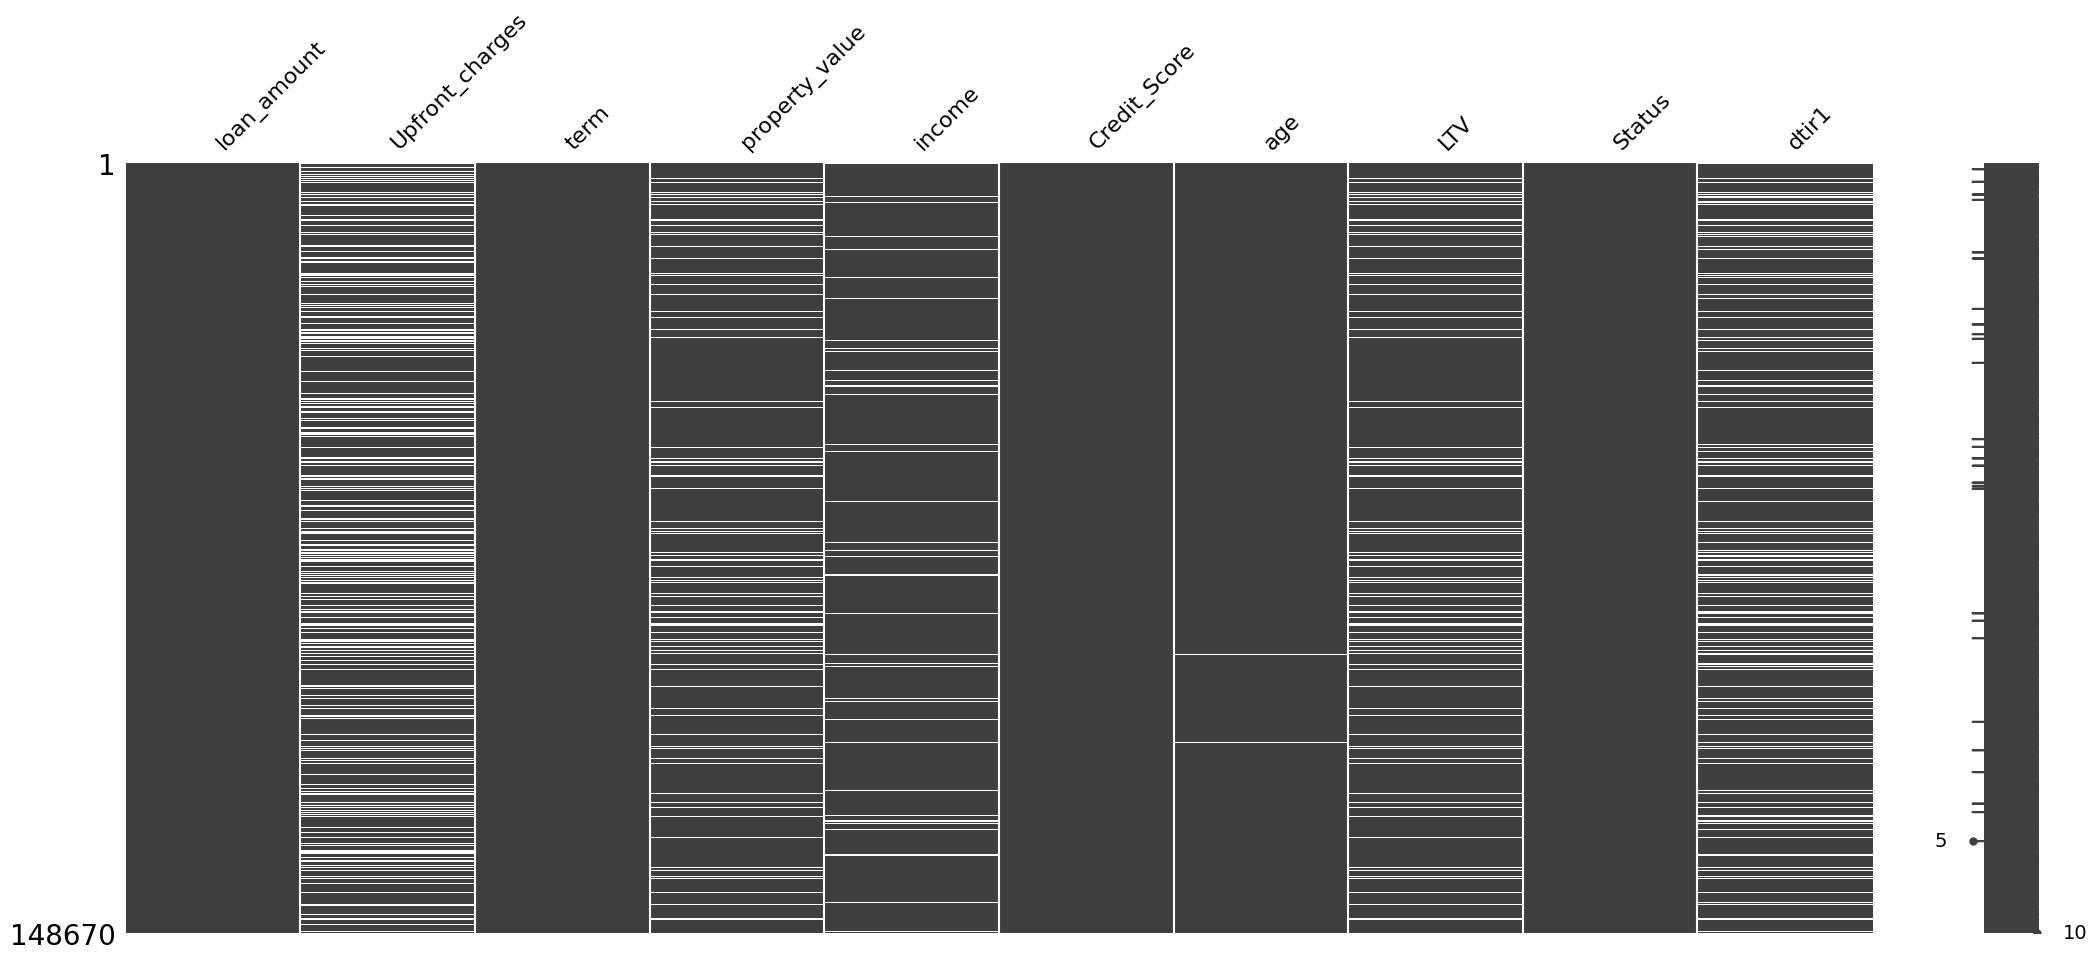

In [110]:
msno.matrix(df)

In [111]:
total = df.shape[0]
miss_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
miss_percent = {}
for col in miss_columns:
    null_count = df[col].isnull().sum()
    percent = (null_count/total) * 100
    miss_percent[col] = percent
    print("{} : {} ({}%)".format(col, null_count, round(percent, 3)))

Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


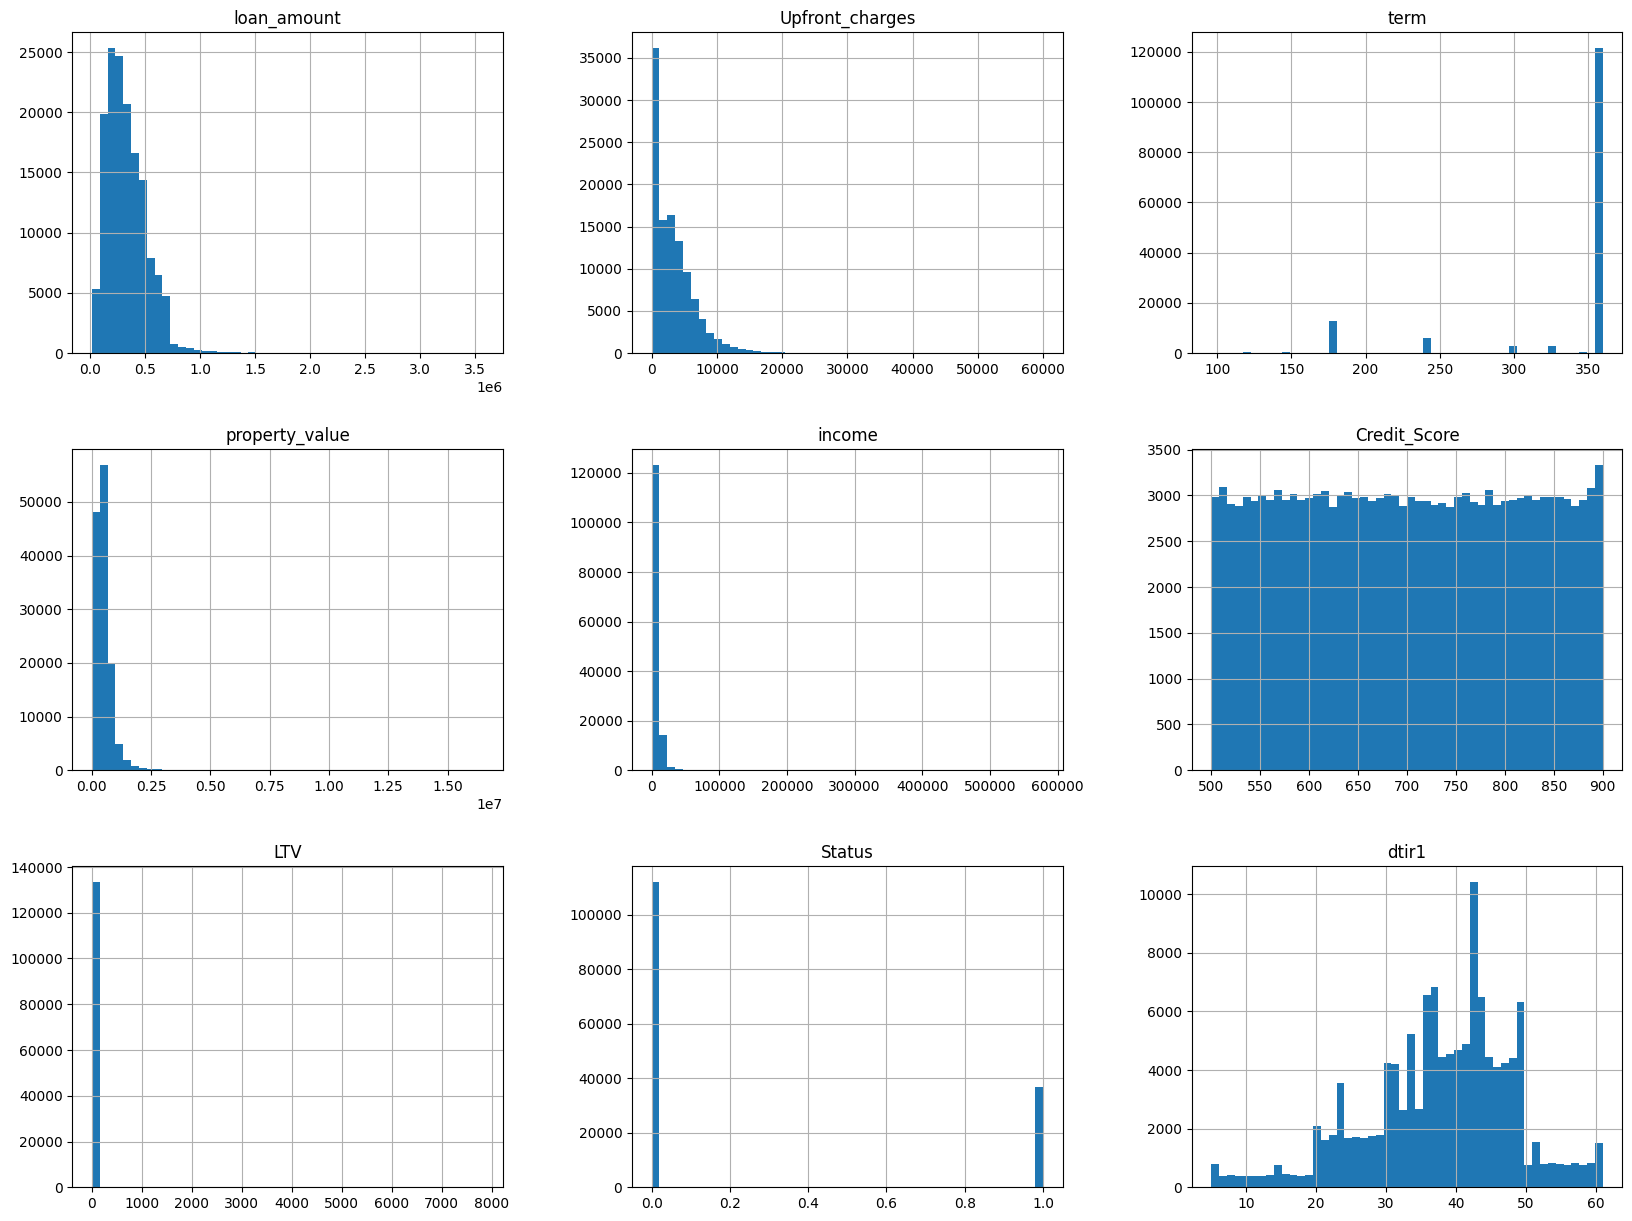

In [112]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

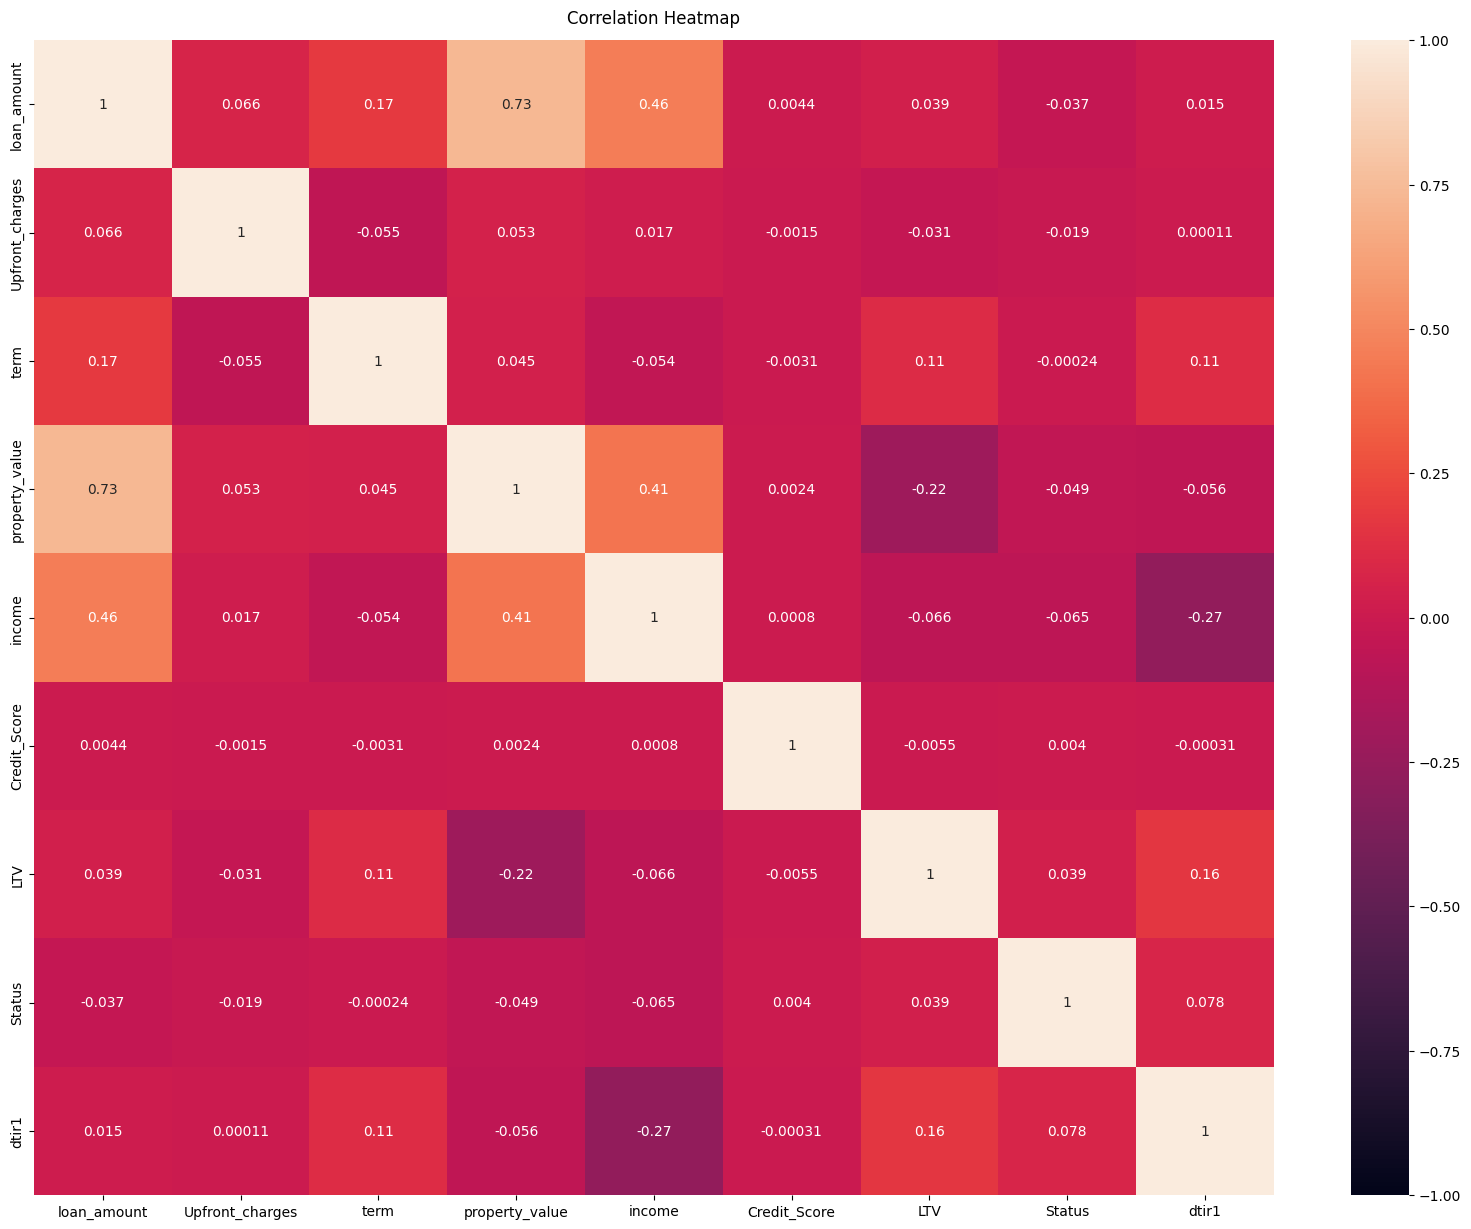

In [113]:
corr = df.drop(columns=["age"],axis=1).corr()
plt.figure(figsize=(20, 15))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [114]:
df.isnull().sum()

loan_amount            0
Upfront_charges    39642
term                  41
property_value     15098
income              9150
Credit_Score           0
age                  200
LTV                15098
Status                 0
dtir1              24121
dtype: int64

In [115]:
df.dtypes

loan_amount          int64
Upfront_charges    float64
term               float64
property_value     float64
income             float64
Credit_Score         int64
age                 object
LTV                float64
Status               int64
dtir1              float64
dtype: object

In [116]:
uc_att_1 = df["Upfront_charges"].fillna(df.groupby('loan_amount')['Upfront_charges'].transform(lambda x: x.mean()))
uc_att_1.isnull().sum()

54

In [117]:
uc_att_2 = df["Upfront_charges"].fillna(df.groupby(['loan_amount','term'])['Upfront_charges'].transform(lambda x: x.mean()))
uc_att_2.isnull().sum()

261

In [118]:
np.max(uc_att_1 - uc_att_2), np.min(uc_att_1 - uc_att_2)

(7812.465, -19690.0)

In [119]:
df["Upfront_charges"] = uc_att_2

In [120]:
df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [121]:
df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0]),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1516\3484462955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0]),inplace=True)


In [122]:
df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean())).isnull().sum()   

7

In [123]:
df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean()),inplace=True)   

C:\Users\hskay\AppData\Local\Temp\ipykernel_1516\464885817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean()),inplace=True)


In [124]:
df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean())).isnull().sum()

6

In [125]:
df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1516\3743406681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean()),inplace=True)


In [126]:
df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [127]:
df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0]),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1516\3001916602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0]),inplace=True)


In [128]:
df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean())).isnull().sum()

1

In [129]:
df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1516\841890541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean()),inplace=True)


In [130]:
df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean())).isnull().sum()

7

In [131]:
df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1516\2025548805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean()),inplace=True)


In [132]:
df.isnull().sum()

loan_amount          0
Upfront_charges    261
term                 0
property_value       7
income               6
Credit_Score         0
age                  0
LTV                  1
Status               0
dtir1                7
dtype: int64

In [133]:
df["Upfront_charges"]=df["Upfront_charges"].fillna(df["Upfront_charges"].mean())
df["property_value"]=df["property_value"].fillna(df["property_value"].mean())
df["income"]=df["income"].fillna(df["income"].mean())
df["LTV"]=df["LTV"].fillna(df["LTV"].mean())
df["dtir1"]=df["dtir1"].fillna(df["dtir1"].mean())

In [134]:
df.isnull().sum().sum()

0

In [135]:
del df_old
del df_main

cols = list(df.columns[:-2])
cols.extend([df.columns[-1],df.columns[-2]])

df = df[cols]
df.columns = df.columns.str.lower()
df_main = df.copy()

## 2.3 Outlier Analysis
Identify and handle outliers in the data.Plot features using boxplots to visualize outliers.

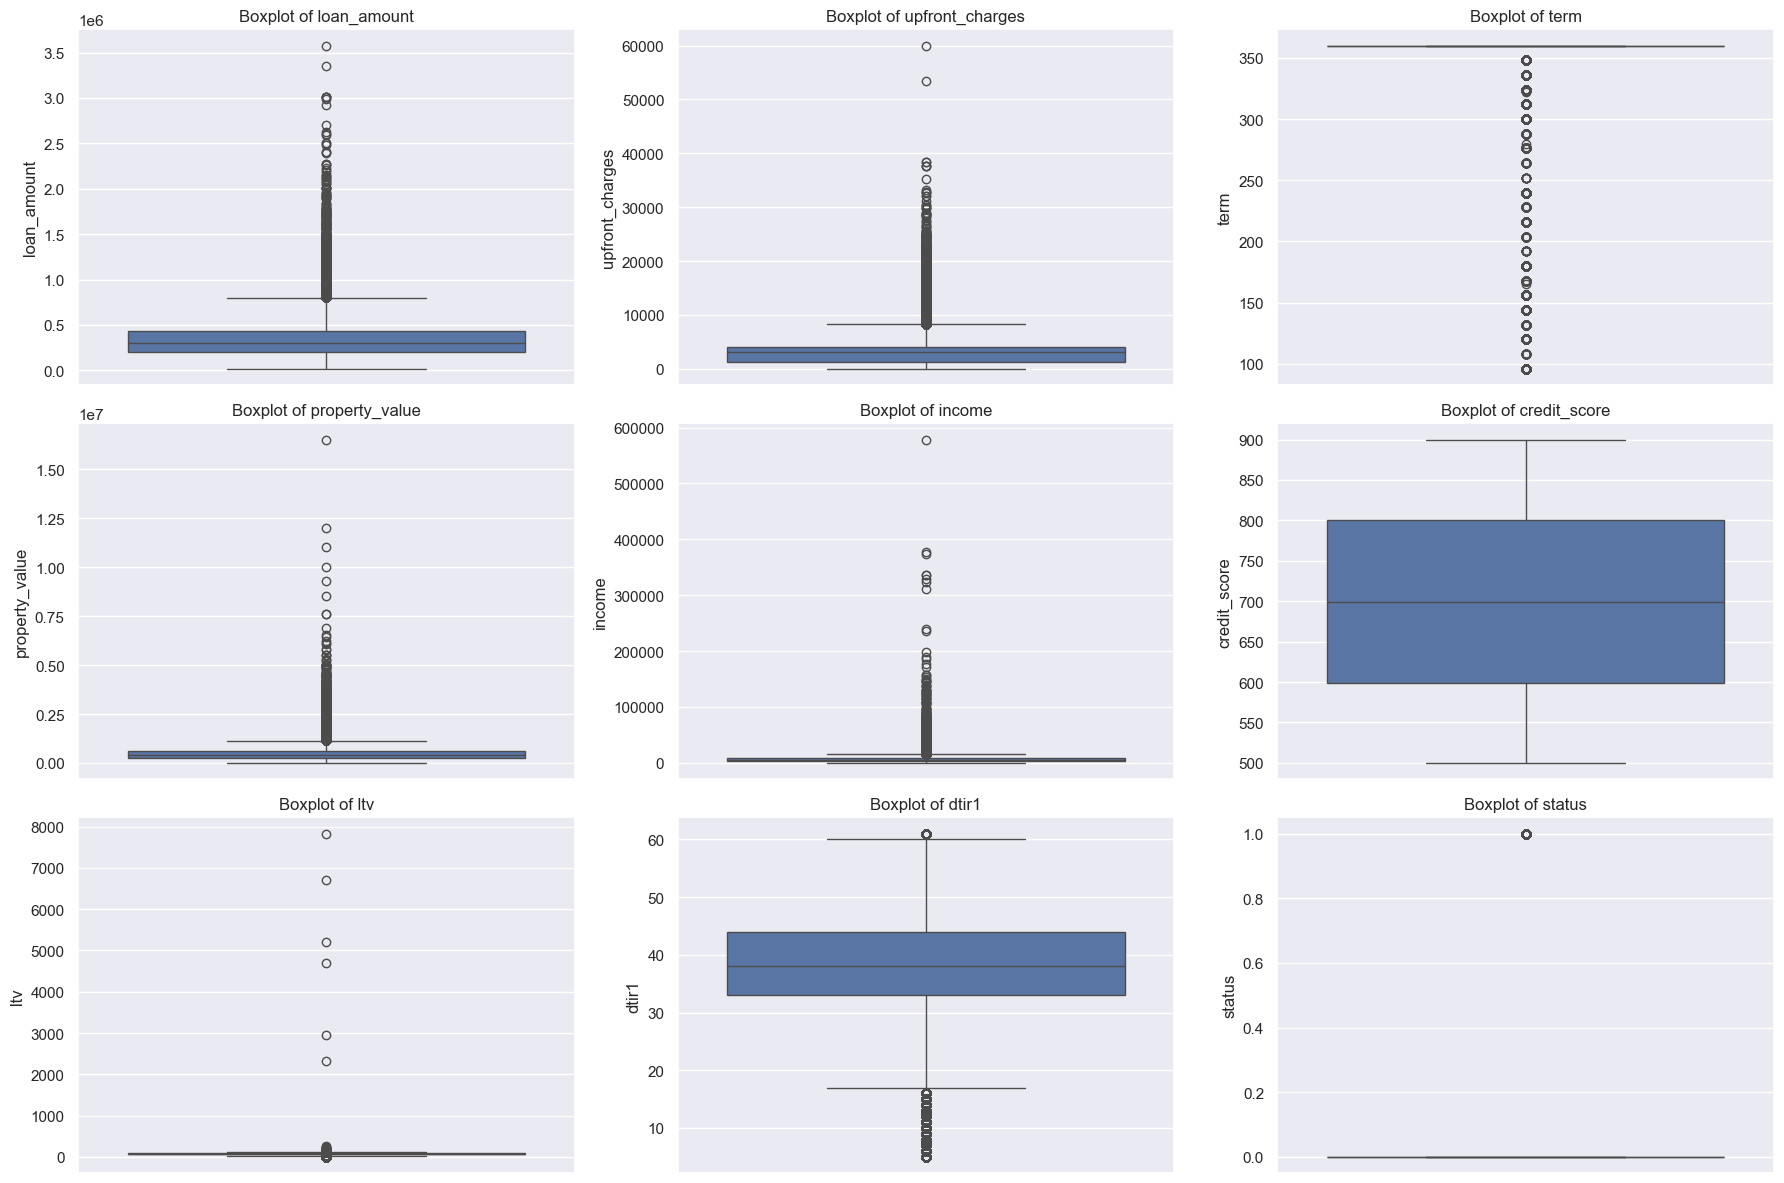

In [136]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

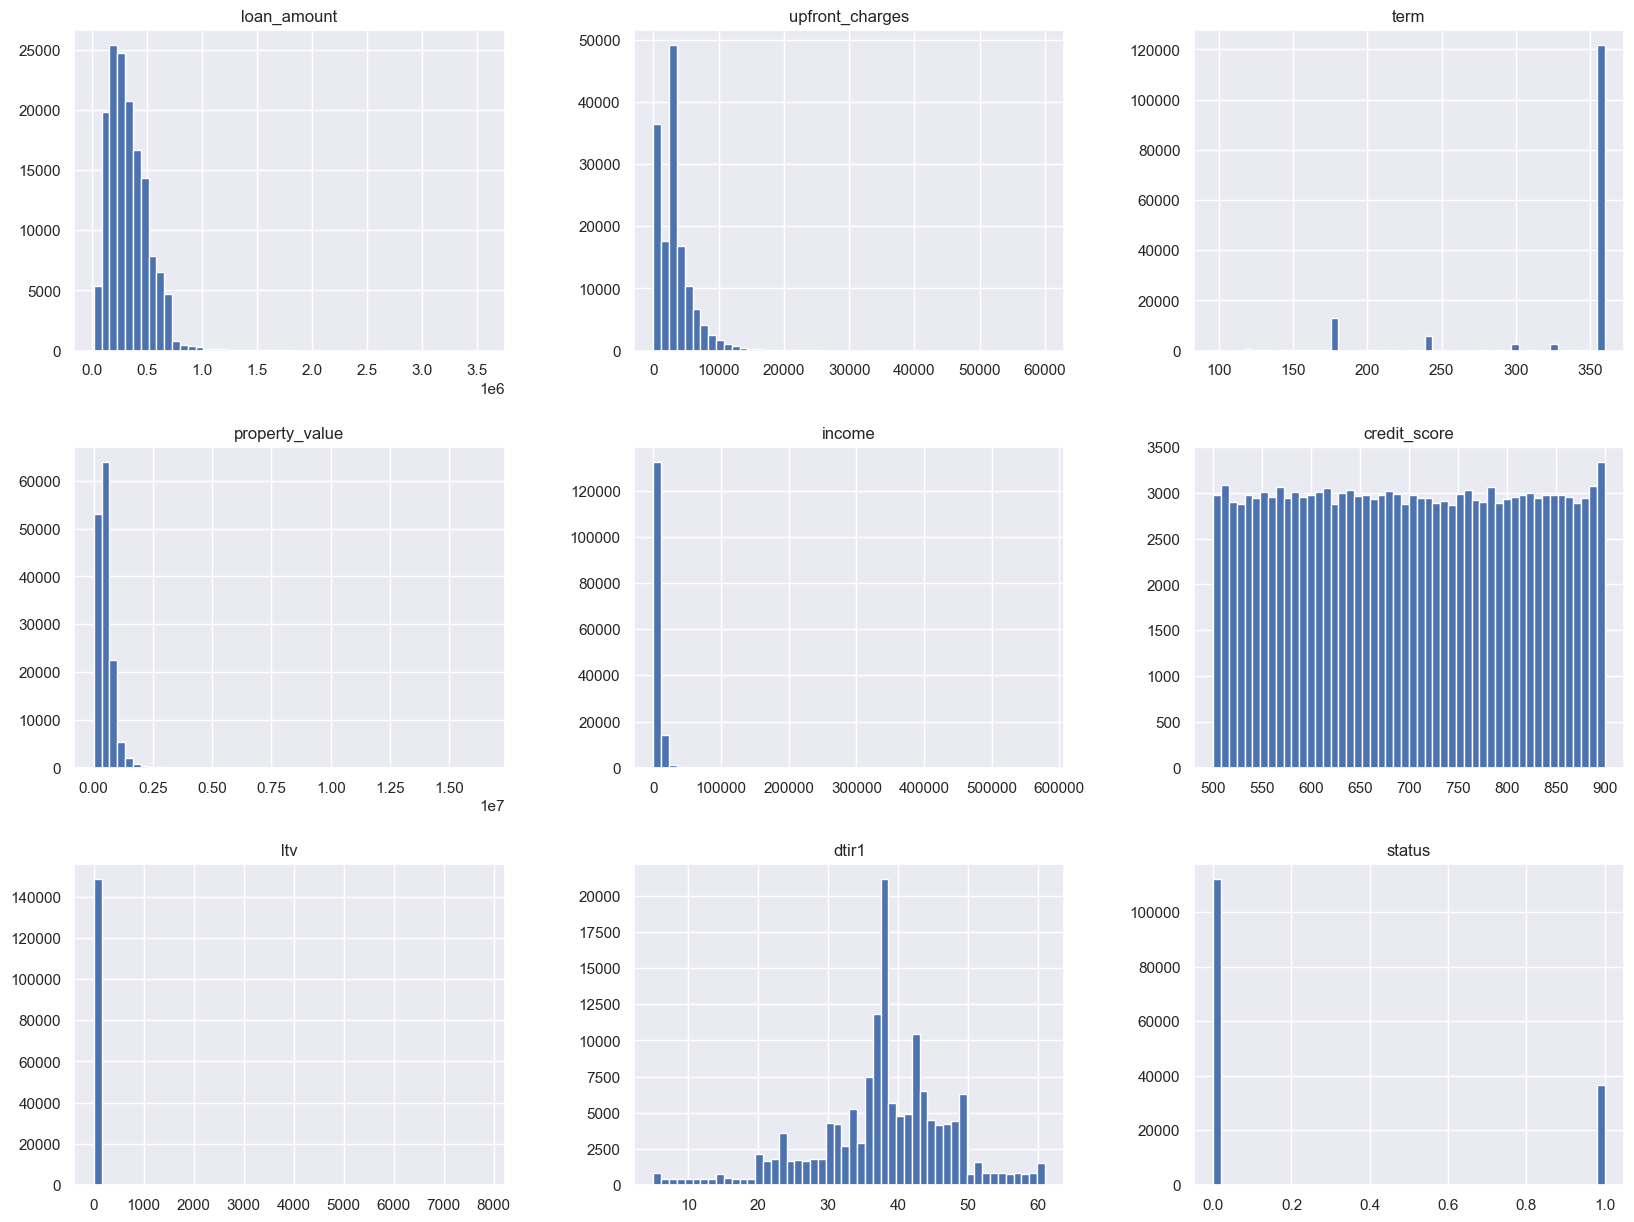

In [137]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

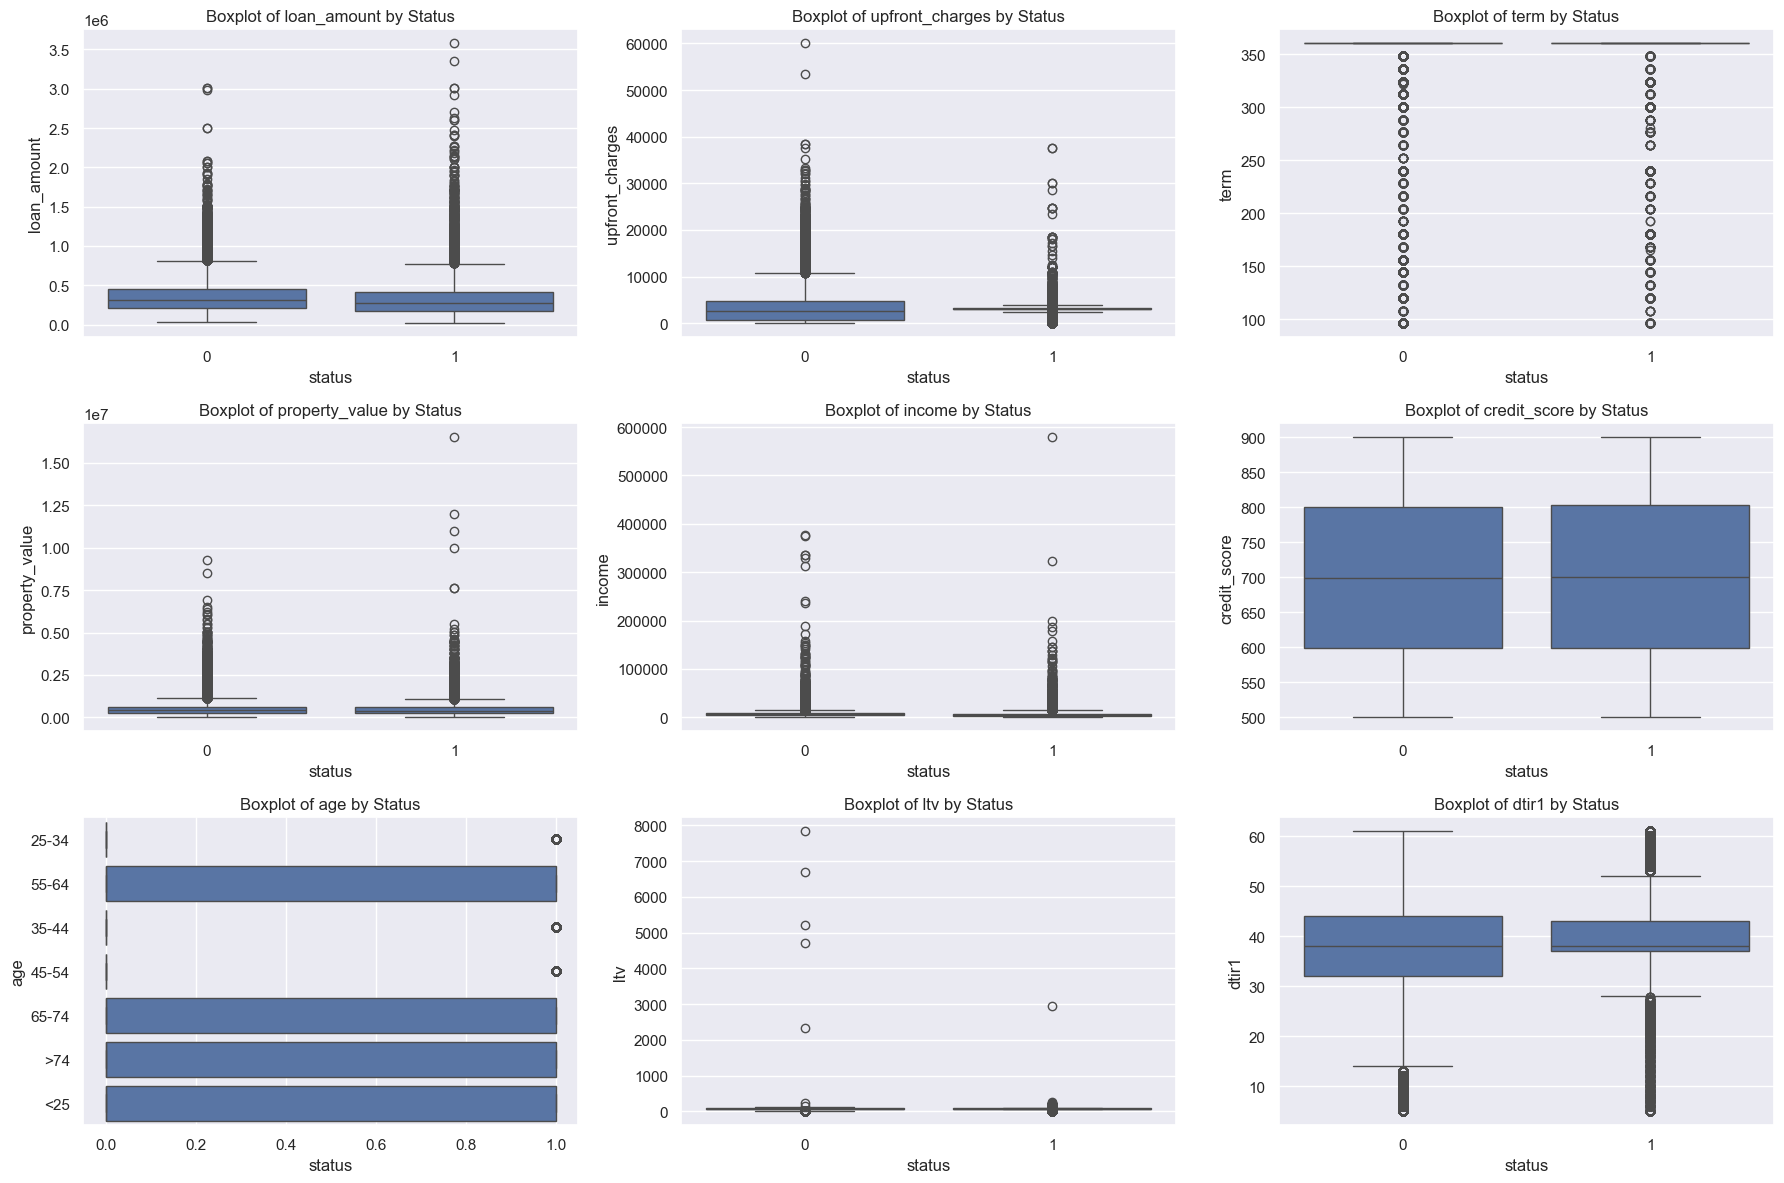

In [138]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

## 2.4 Feature Engineering (if needed)
Transform or create new features to improve model performance

In [139]:
df_2 = df.copy()
df_2["age"] = df["age"].astype('category').cat.codes

In [140]:
y = df_2["status"].copy()
X = df_2.drop("status", axis=1).copy()
del df_2

In [141]:
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)
df_smote = pd.concat([X_smote, y_smote], axis=1)
np.bincount(y_smote)

array([112031, 112031], dtype=int64)

In [142]:
df_smote.head()

loan_amount  upfront_charges   term  property_value   income  credit_score  \
0       116500      2570.136346  360.0   118000.000000   1740.0           758   
1       206500      3002.893204  360.0   350858.517806   4980.0           552   
2       406500       595.000000  360.0   508000.000000   9480.0           834   
3       456500      2977.392940  360.0   658000.000000  11880.0           587   
4       696500         0.000000  360.0   758000.000000  10440.0           602   

   age        ltv      dtir1  status  
0    0  98.728814  45.000000       1  
1    3  74.471918  37.438237       1  
2    1  80.019685  46.000000       0  
3    2  69.376900  42.000000       0  
4    0  91.886544  39.000000       0

In [143]:
X_smote["age"].value_counts()

age
2    56596
1    52368
3    48999
0    28495
4    26105
6     7539
5     3960
Name: count, dtype: int64

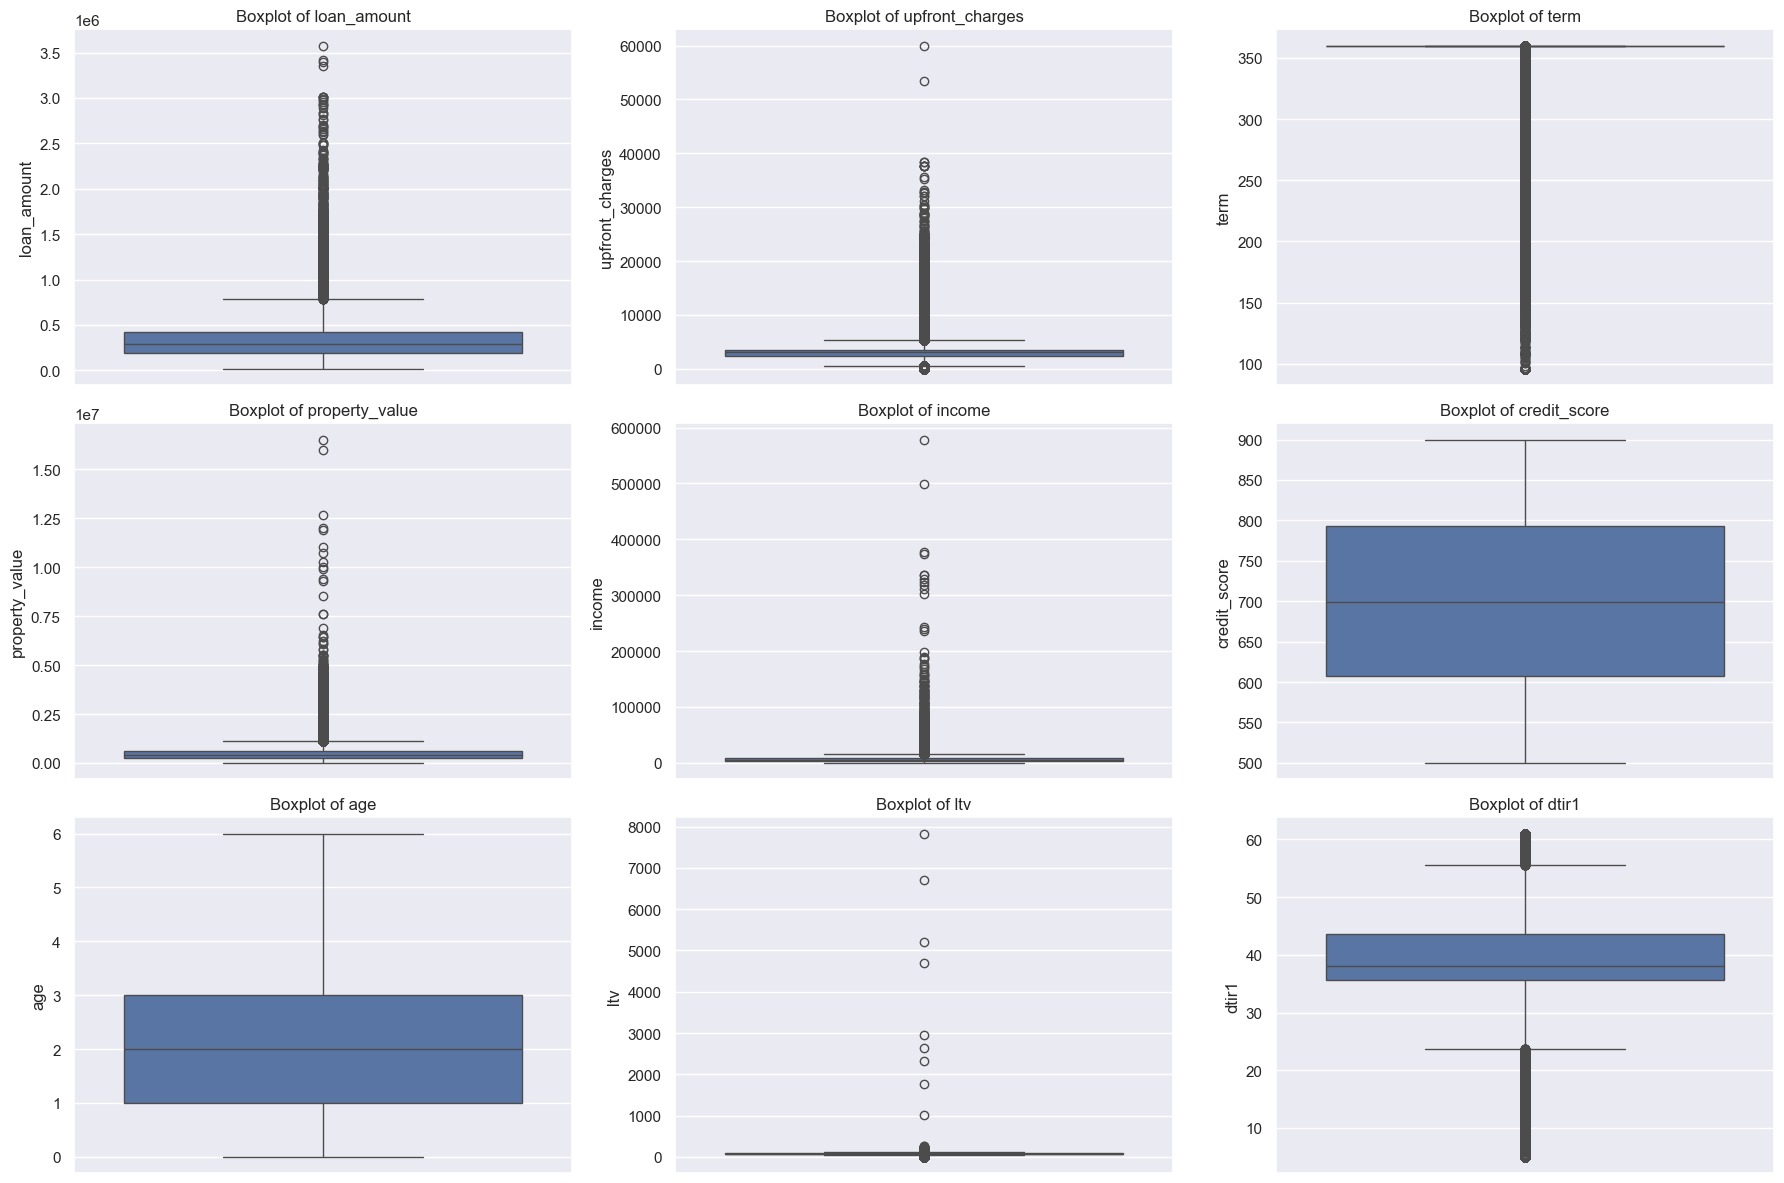

In [144]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_smote)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

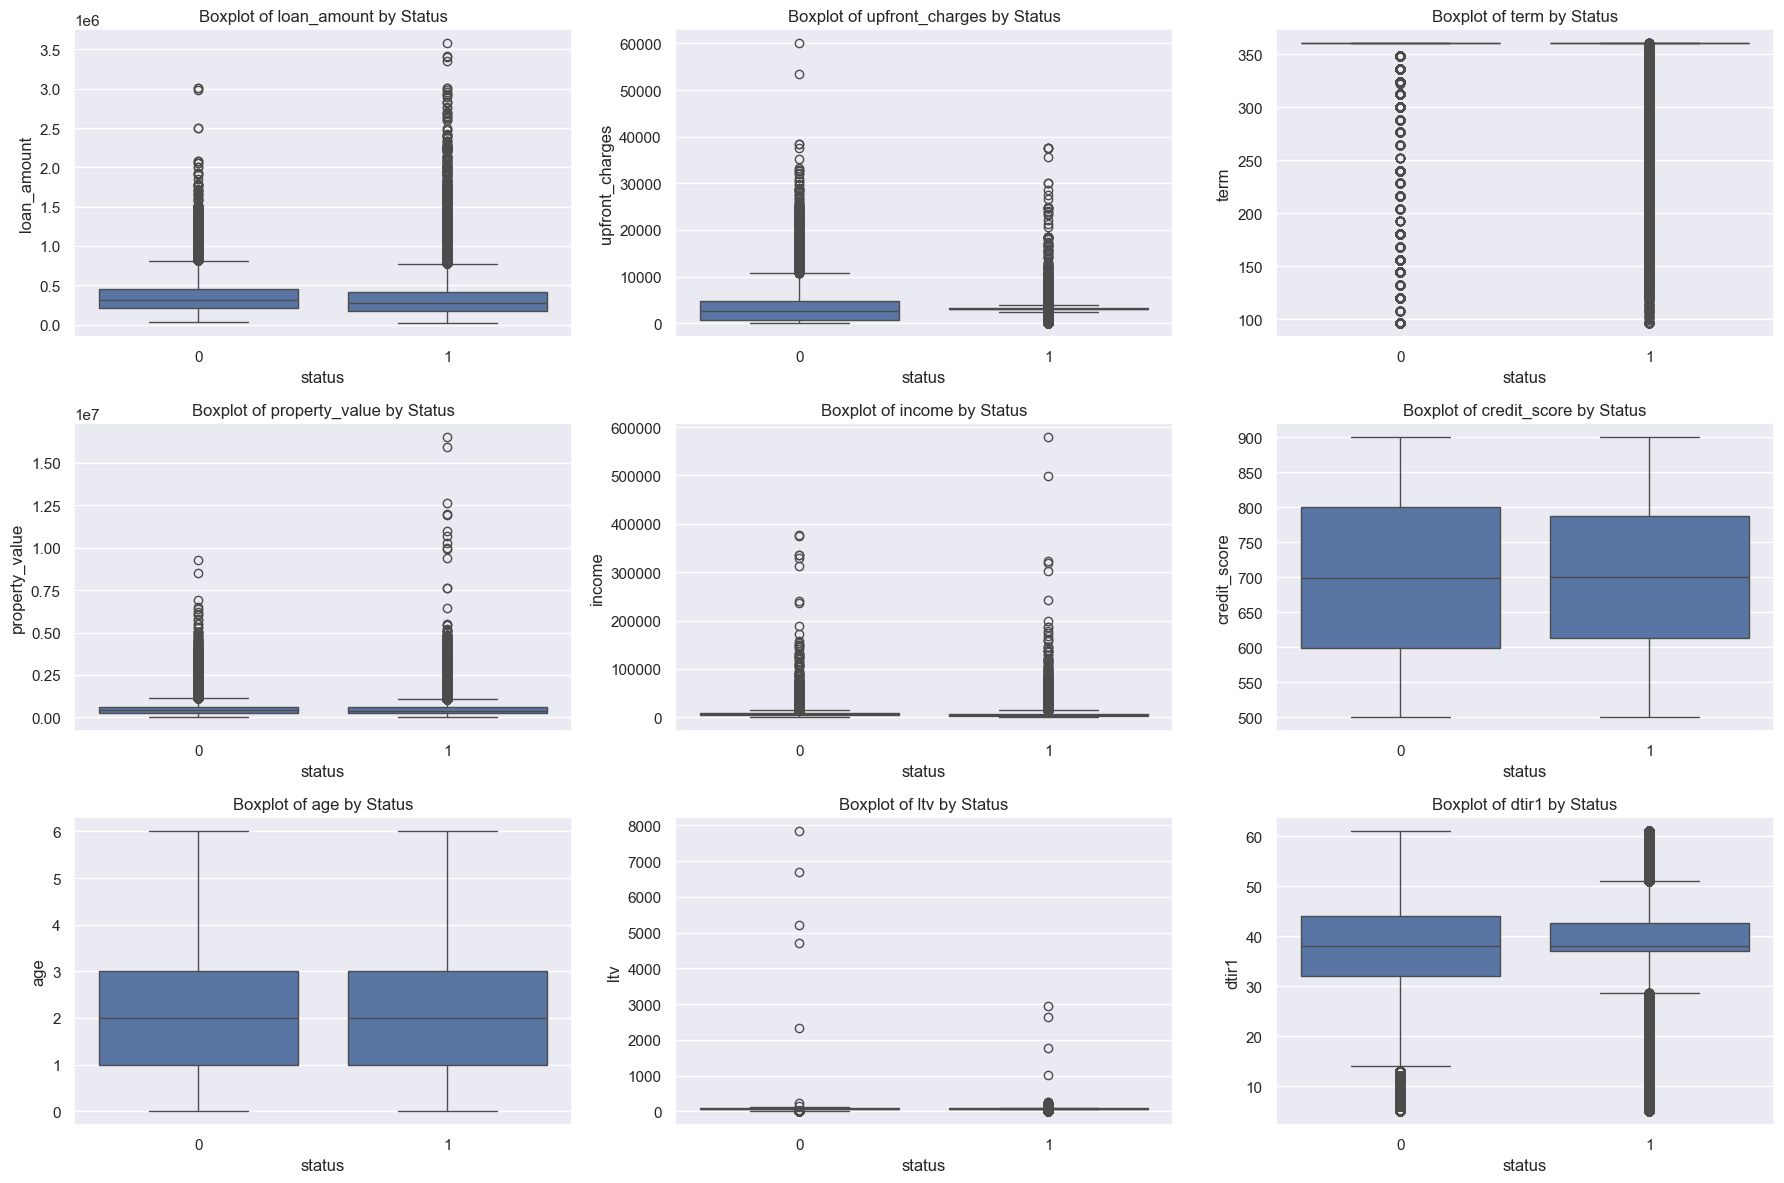

In [145]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

In [146]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
df_adasyn = pd.concat([X_adasyn, y_adasyn], axis=1)
np.bincount(y_adasyn)

array([112031, 110745], dtype=int64)

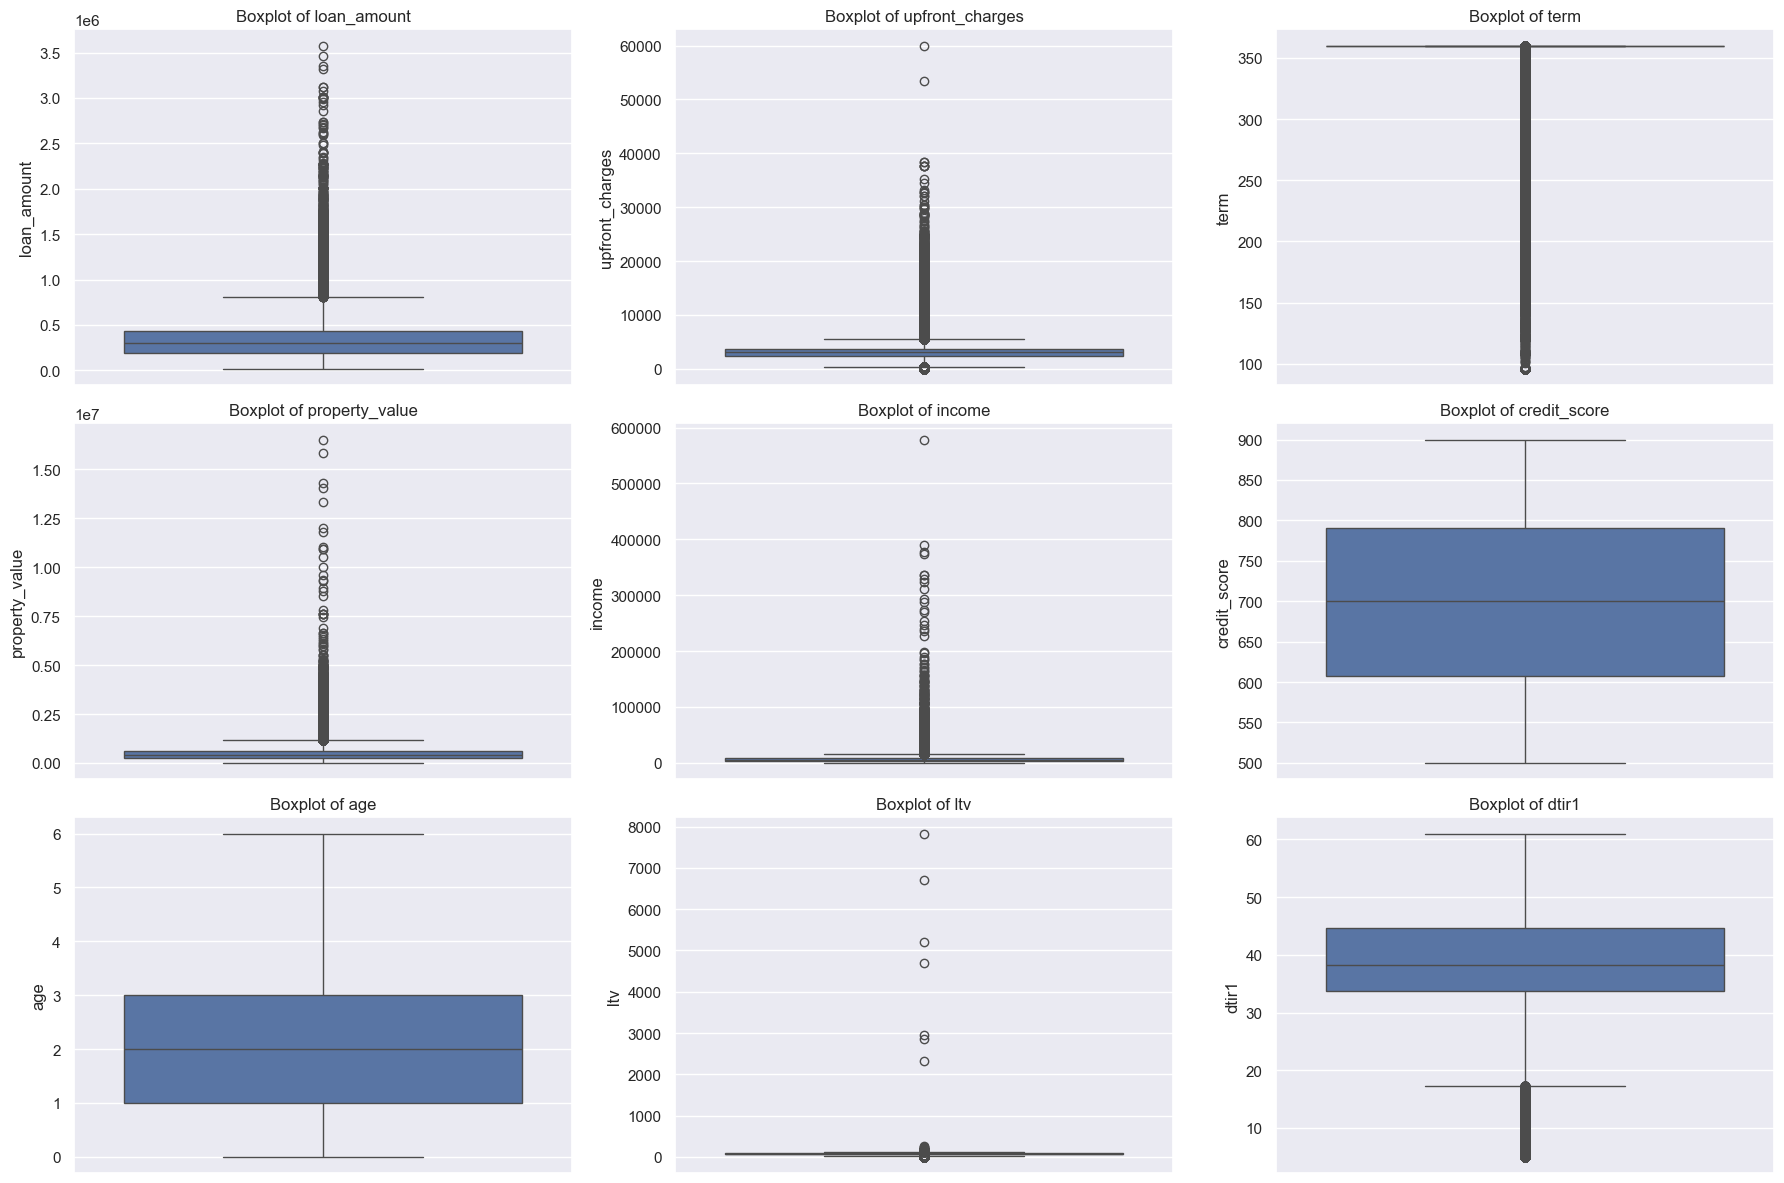

In [147]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_adasyn.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_adasyn)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

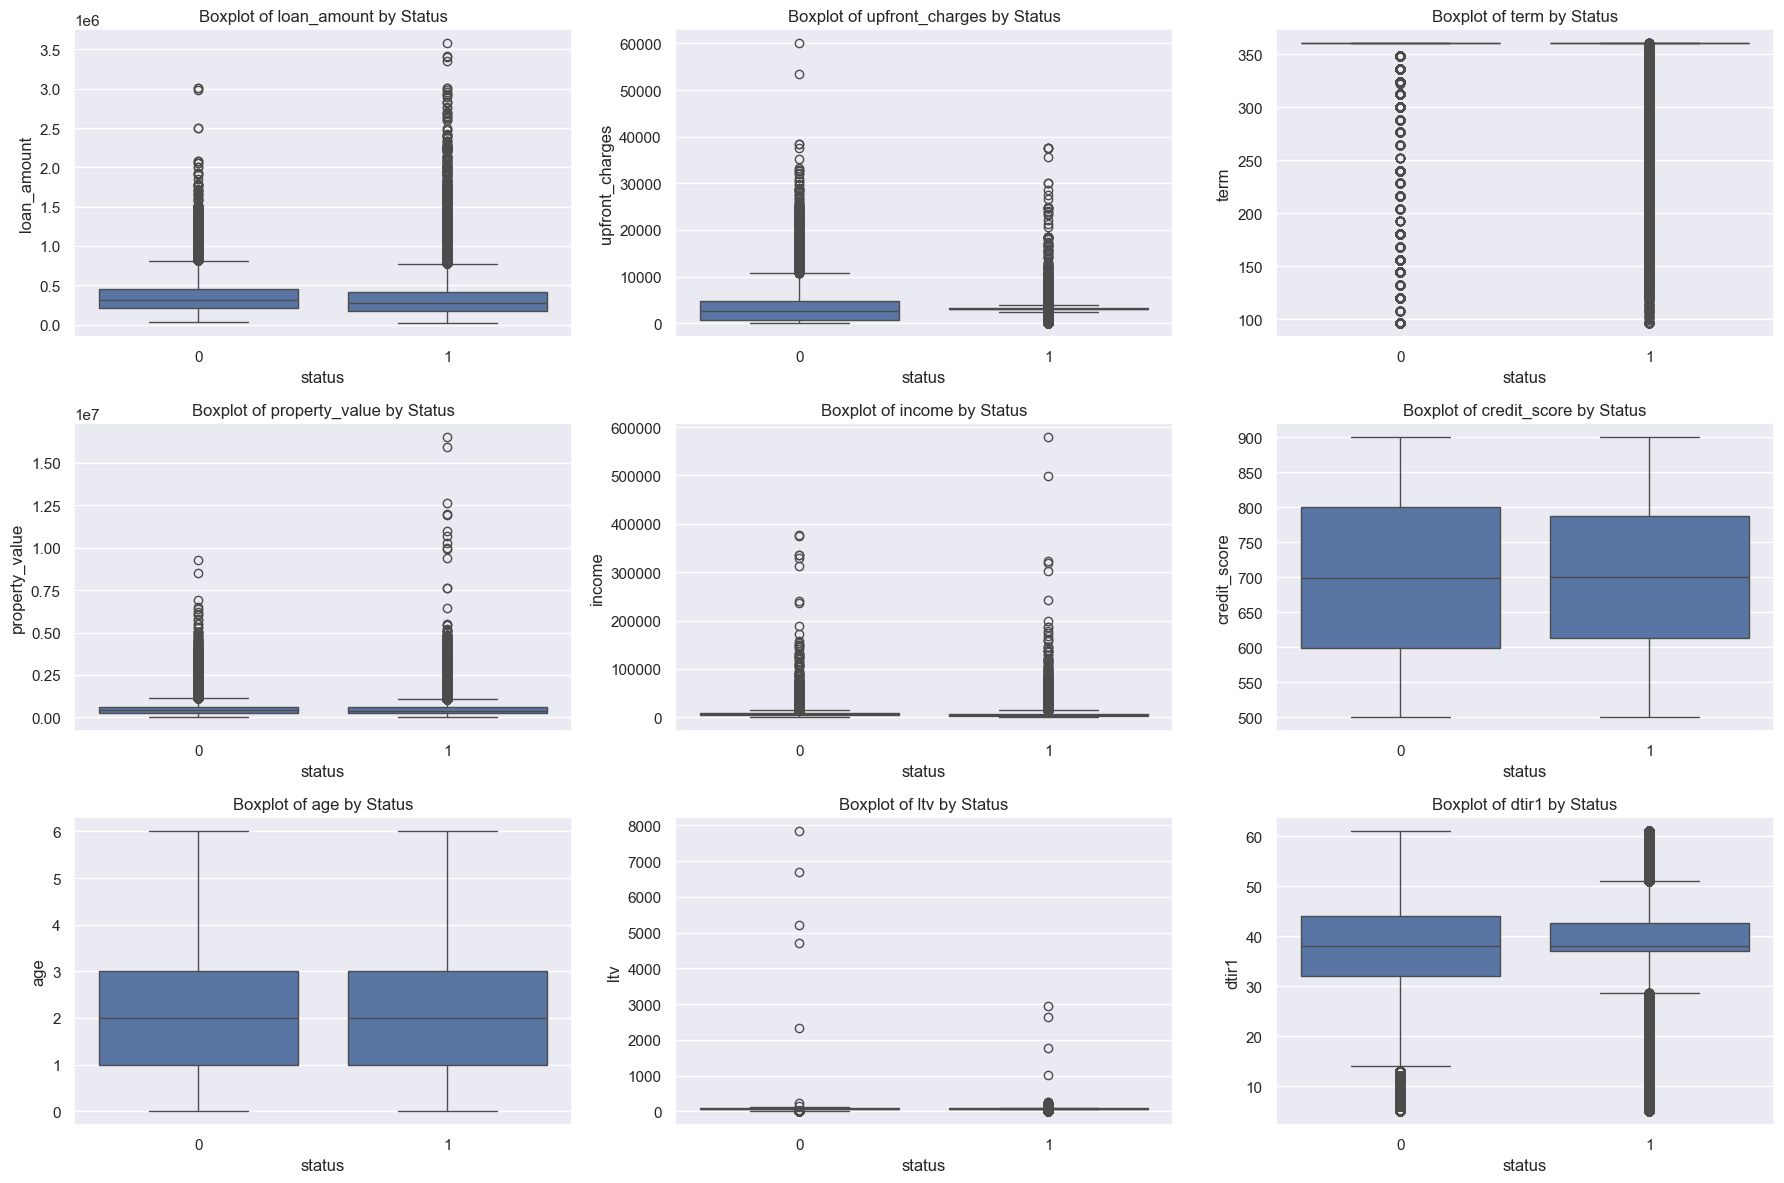

In [148]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

In [149]:
X_adasyn["age"].value_counts()

age
2    57880
1    51099
3    49976
0    26749
4    25671
6     7544
5     3857
Name: count, dtype: int64

In [150]:
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)
df_under = pd.concat([X_under, y_under], axis=1)
np.bincount(y_under)

array([36639, 36639], dtype=int64)

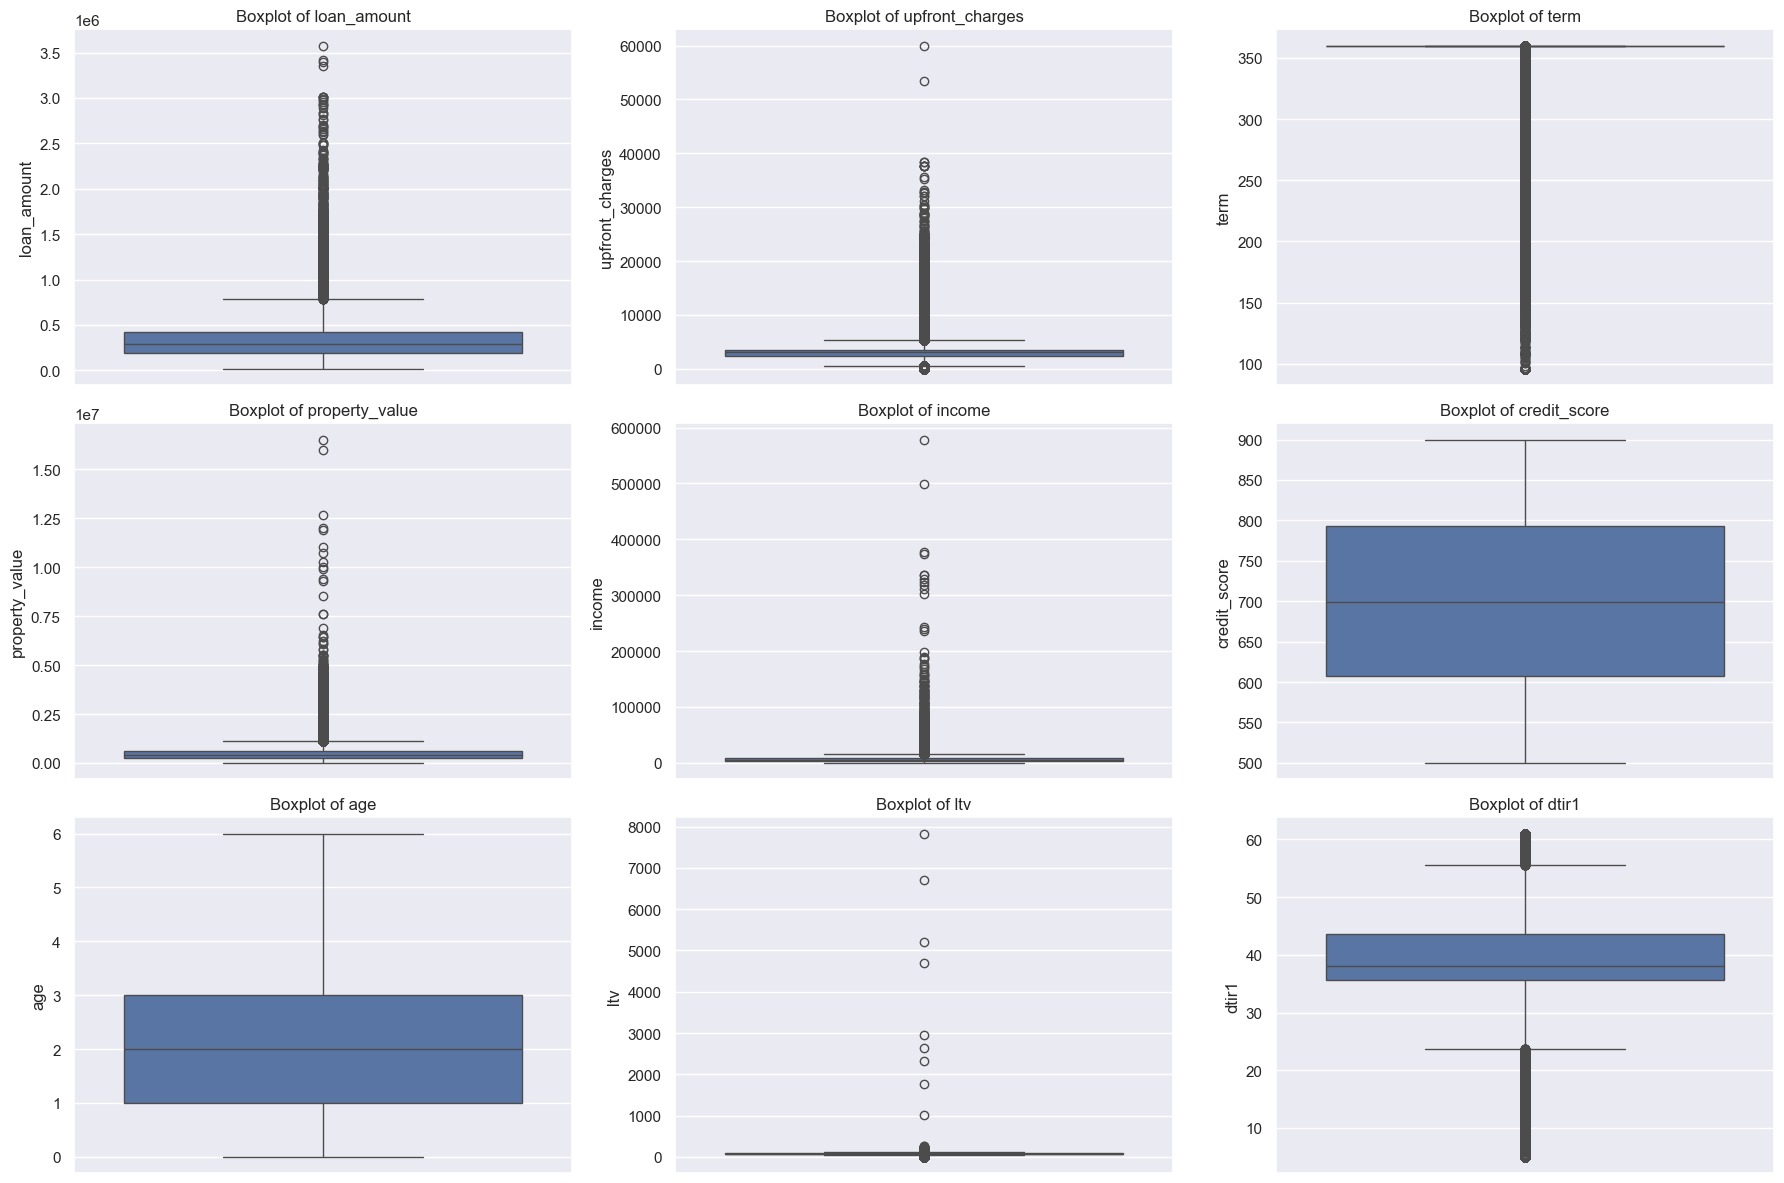

In [151]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_smote)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

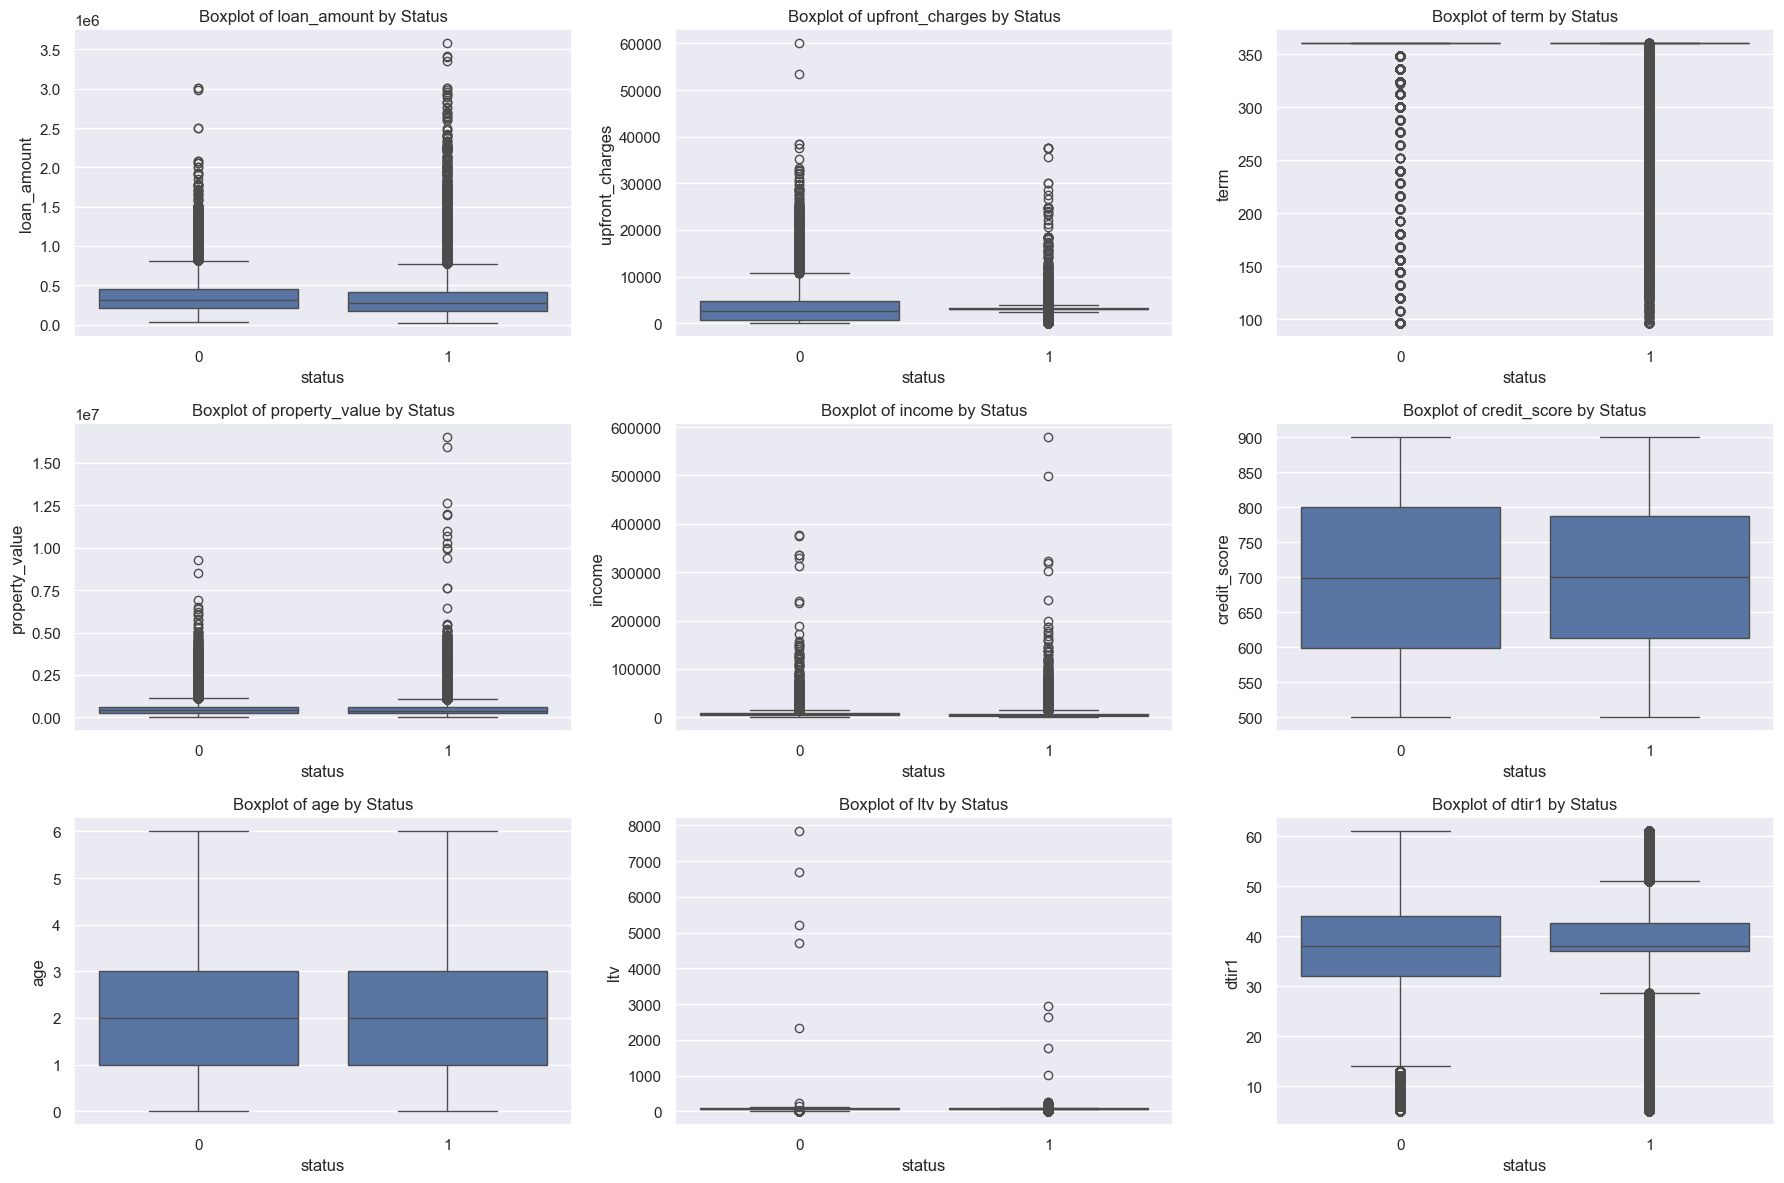

In [152]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 3.1 Data Visualization
Visualize the data to identify trends, patterns, or anomalies. Suggested visualizations:

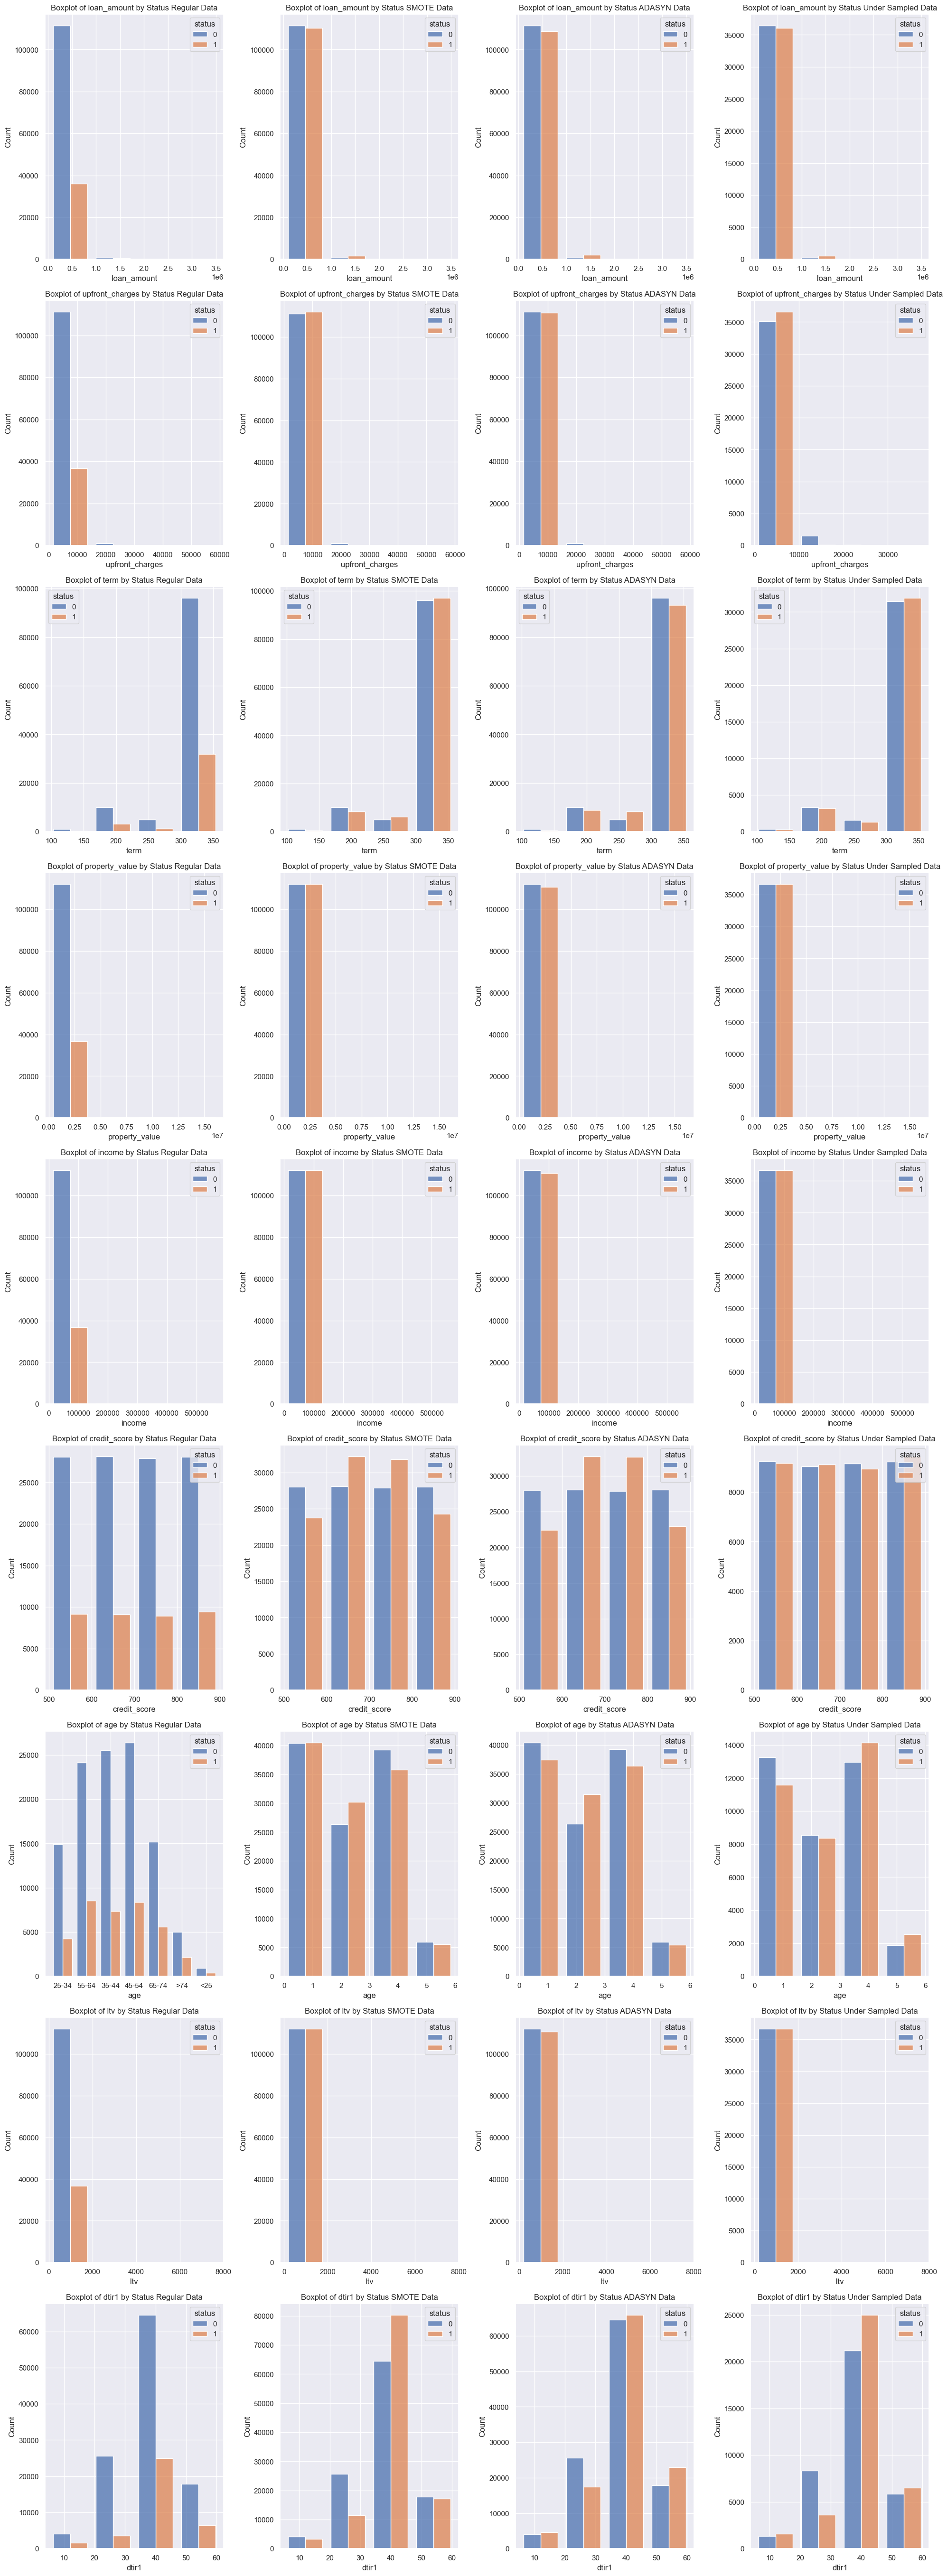

In [153]:
plt.figure(figsize=(20, 60))  
sb.set_theme(style='darkgrid')

df_sets = [df, df_smote, df_adasyn, df_under]
titles = ['Regular Data', 'SMOTE Data', 'ADASYN Data', 'Under Sampled Data']

for i,col in enumerate(df.columns[:-1]):
    for j,title in enumerate(titles):
        plt.subplot(10, 4, i*4 + j+1)  
        sb.histplot(data=df_sets[j], x=col, hue="status", multiple="dodge", shrink=.8, bins=4)
        plt.title('Boxplot of {} by Status {}'.format(col,title))  
        

plt.tight_layout()  
plt.show()

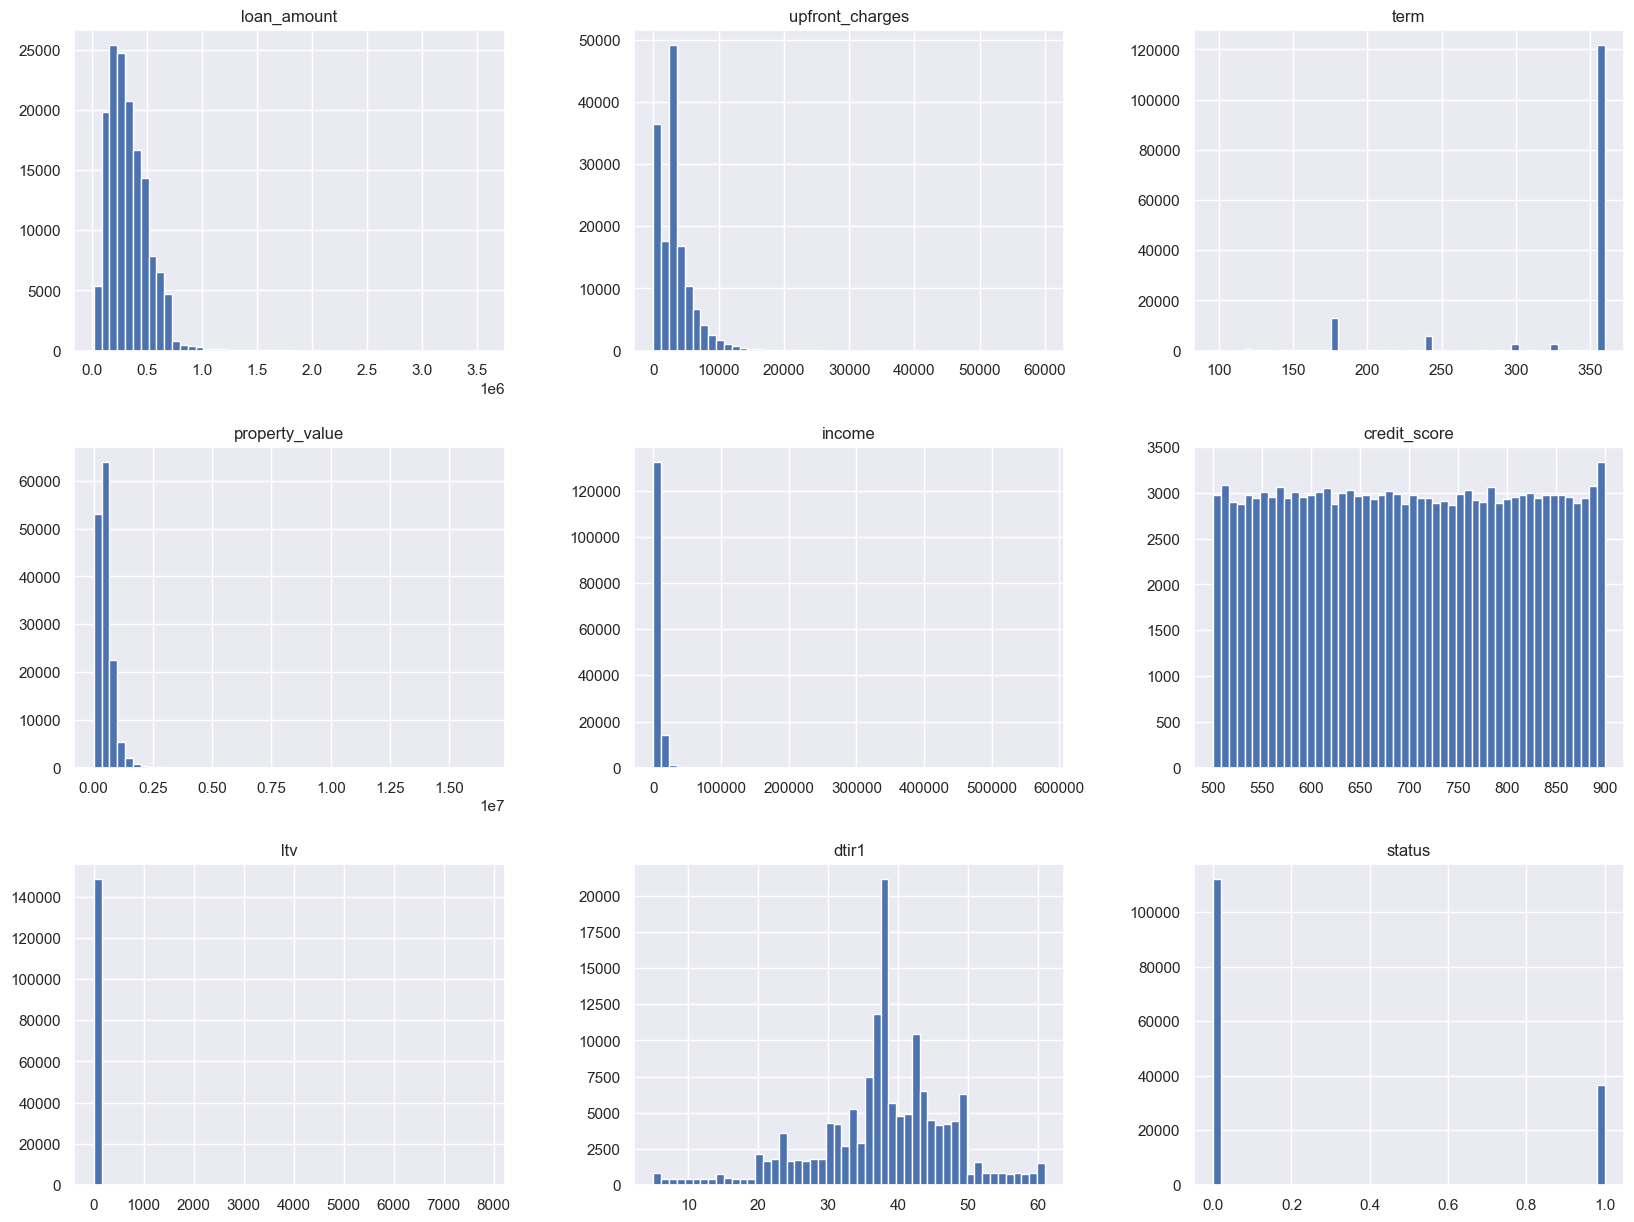

In [154]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

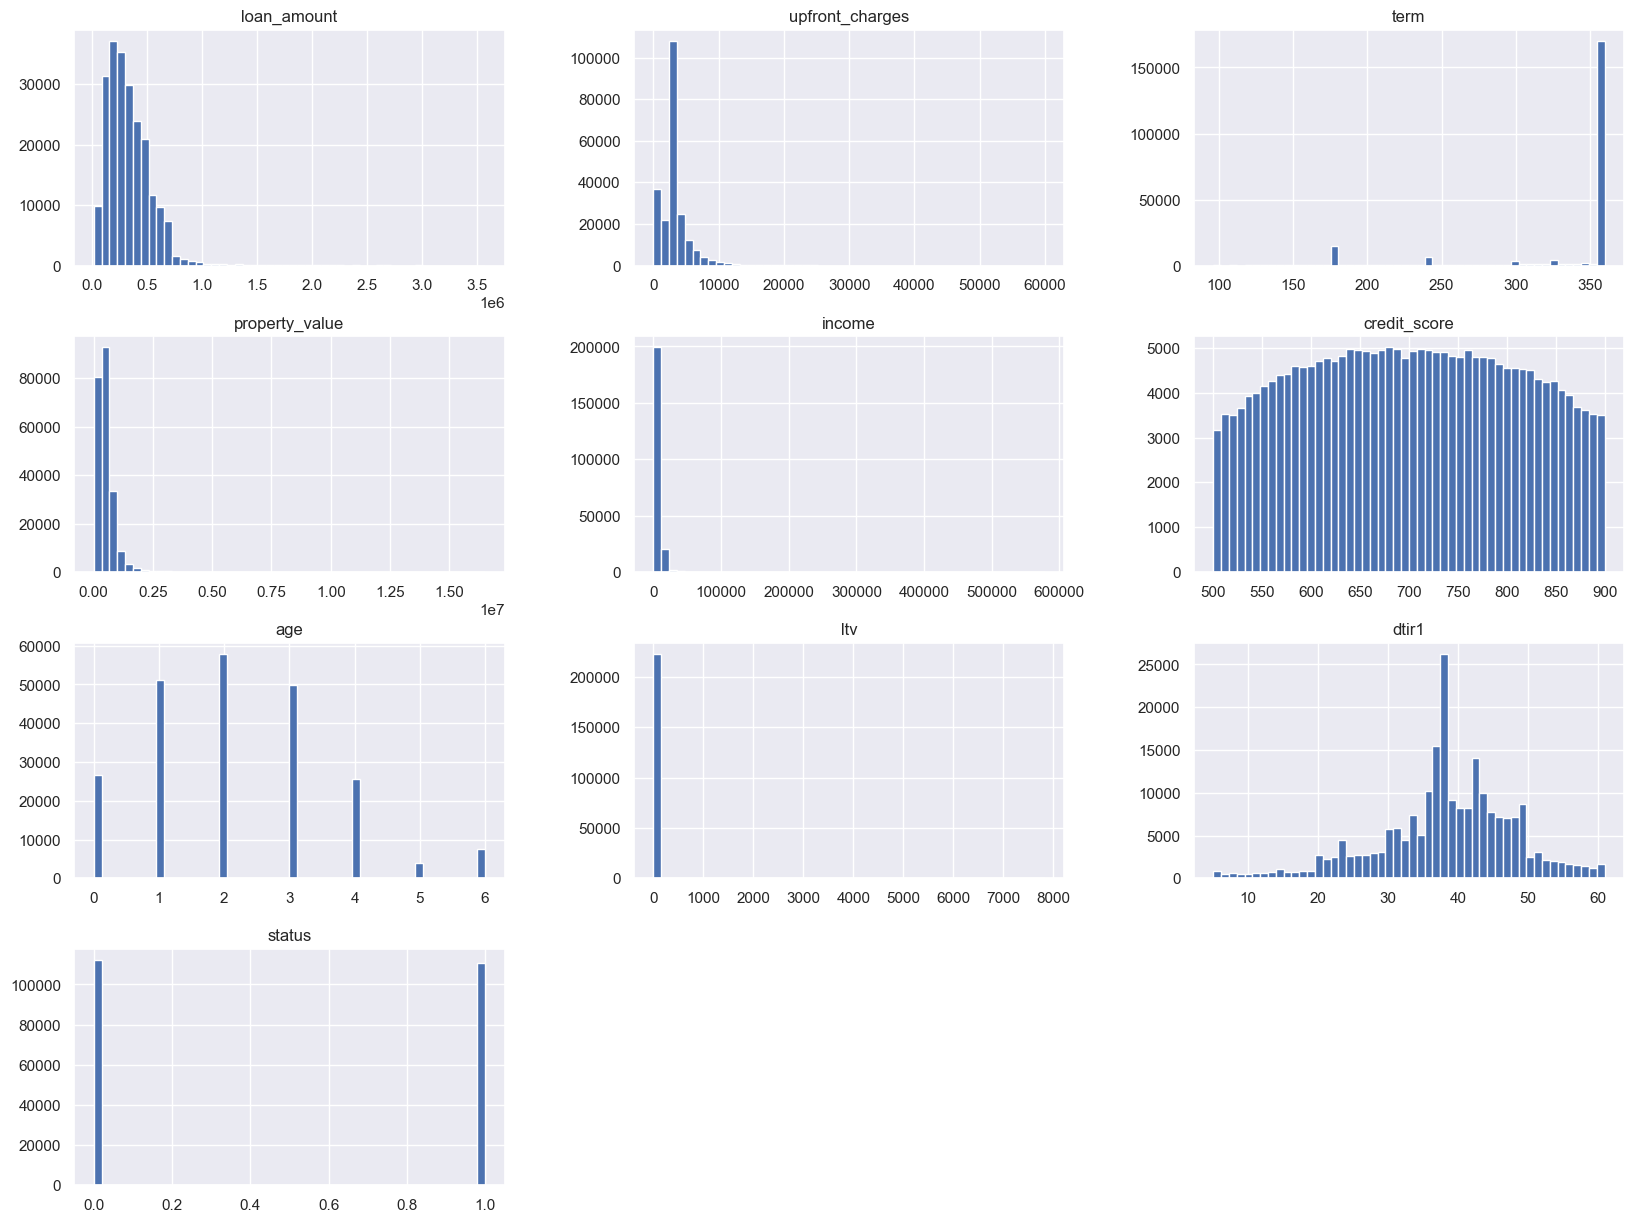

In [155]:
df_adasyn.hist(bins = 50, figsize = (20, 15))
plt.show()

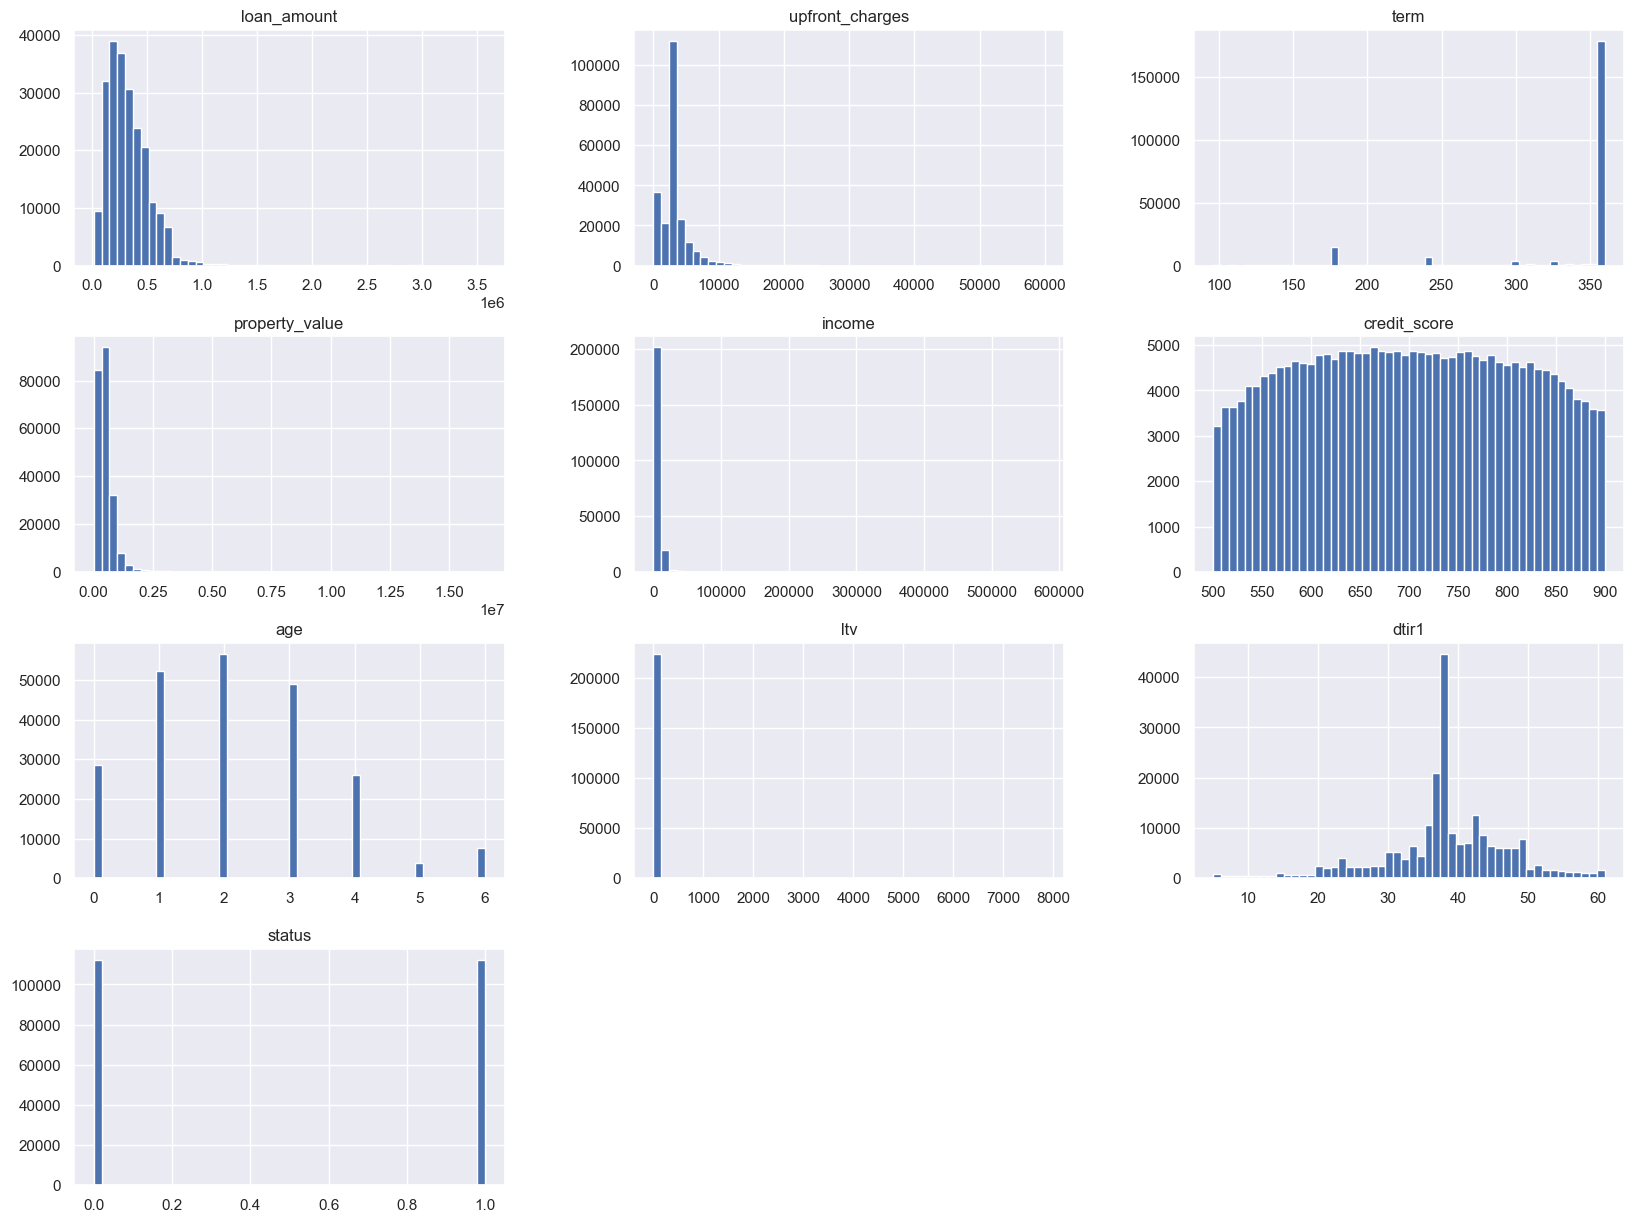

In [156]:
df_smote.hist(bins = 50, figsize = (20, 15))
plt.show()

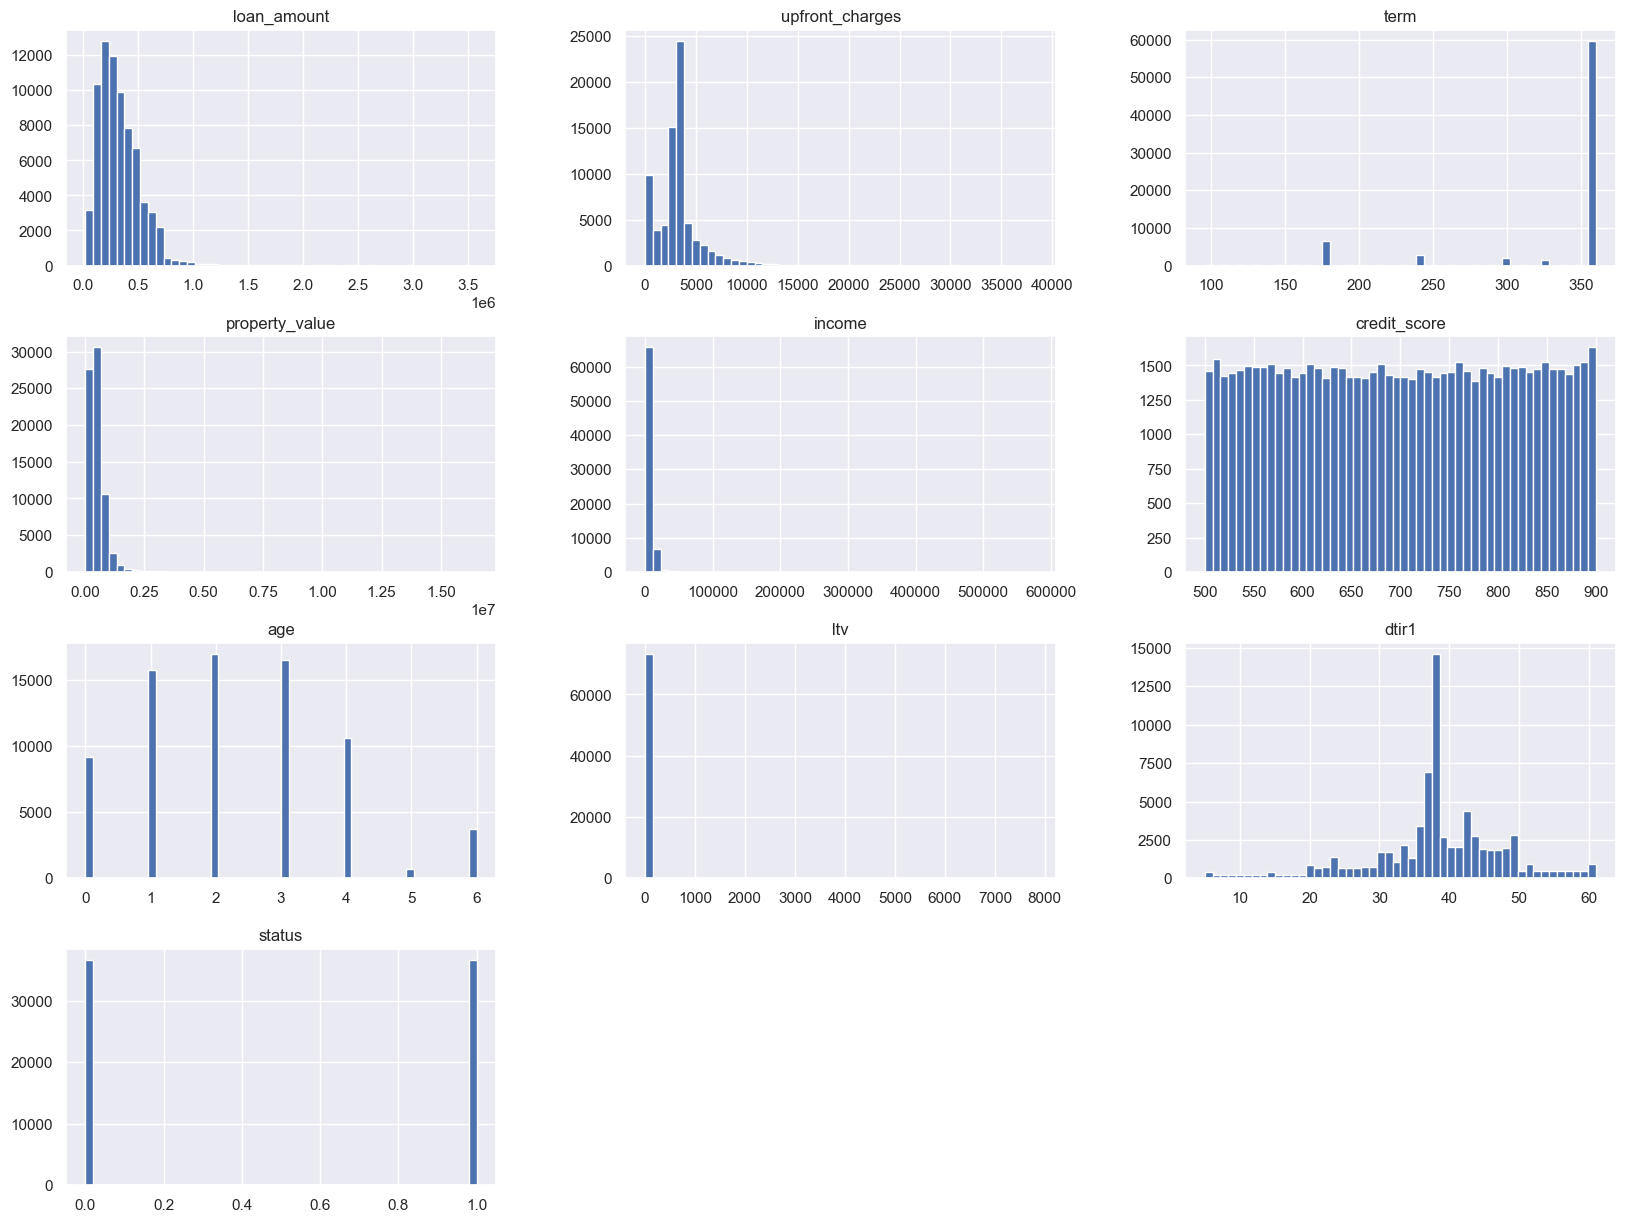

In [157]:
df_under.hist(bins = 50, figsize = (20, 15))
plt.show()

## 3.2 Correlation Analysis
Analyze correlations between numerical features

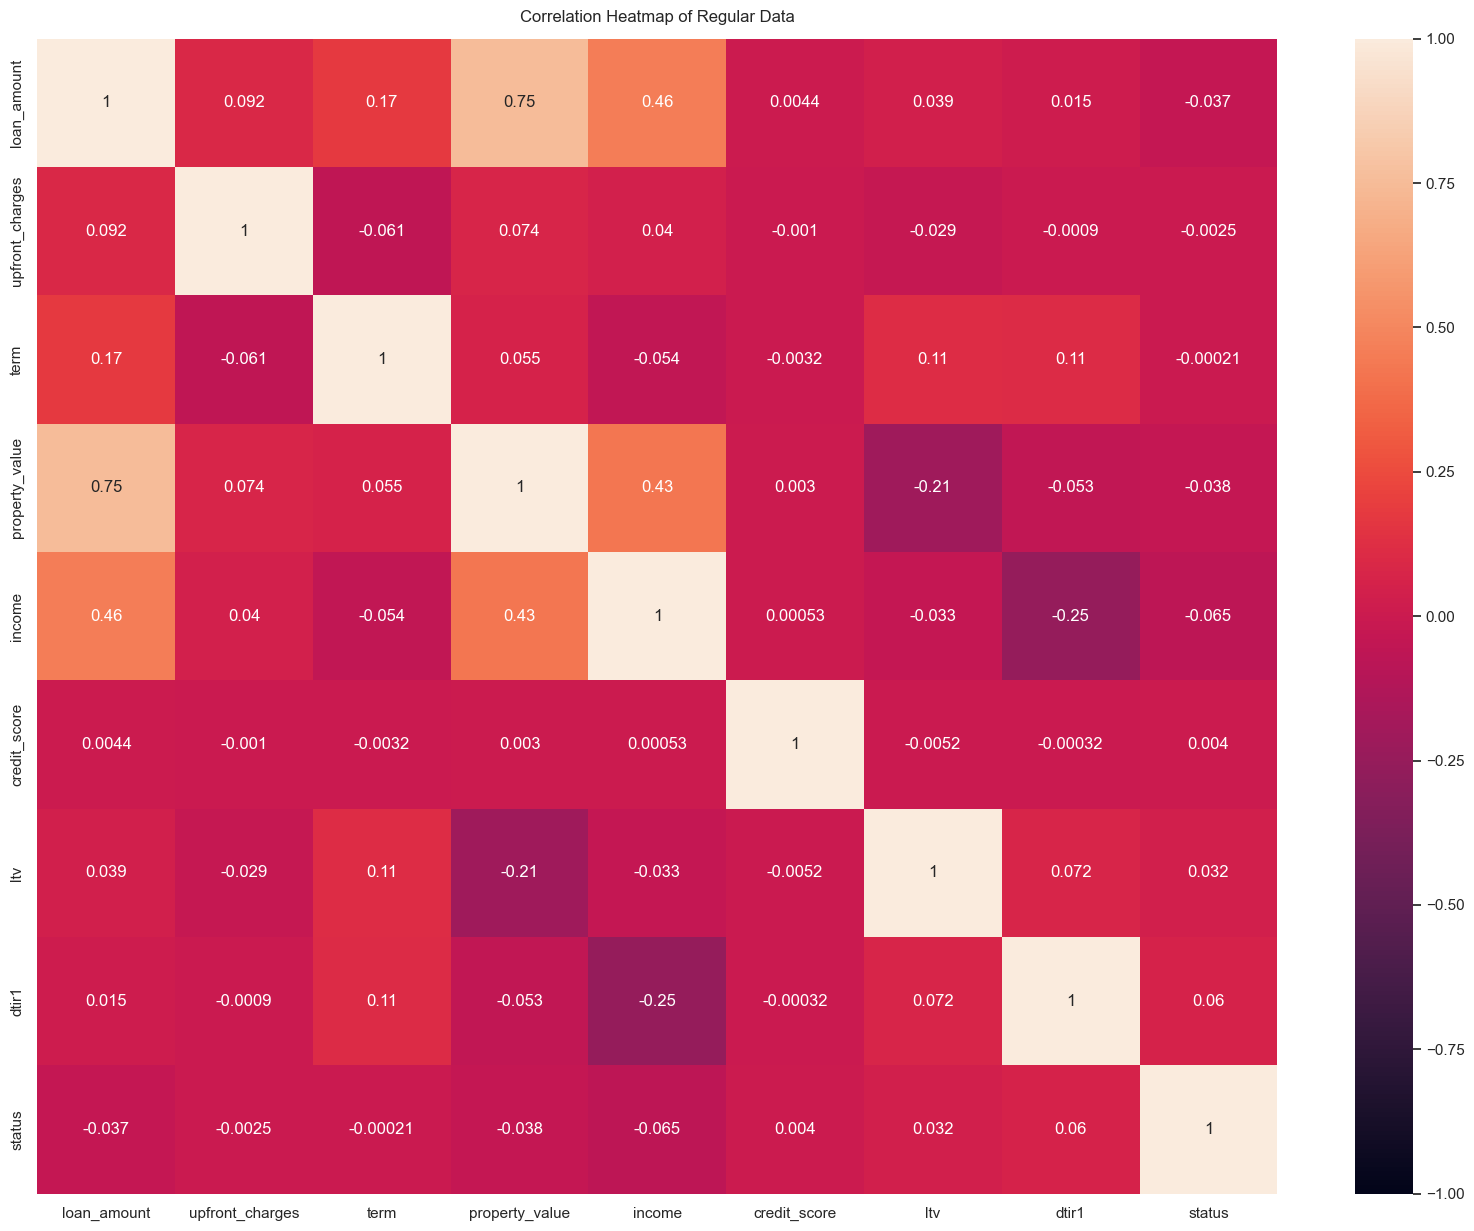

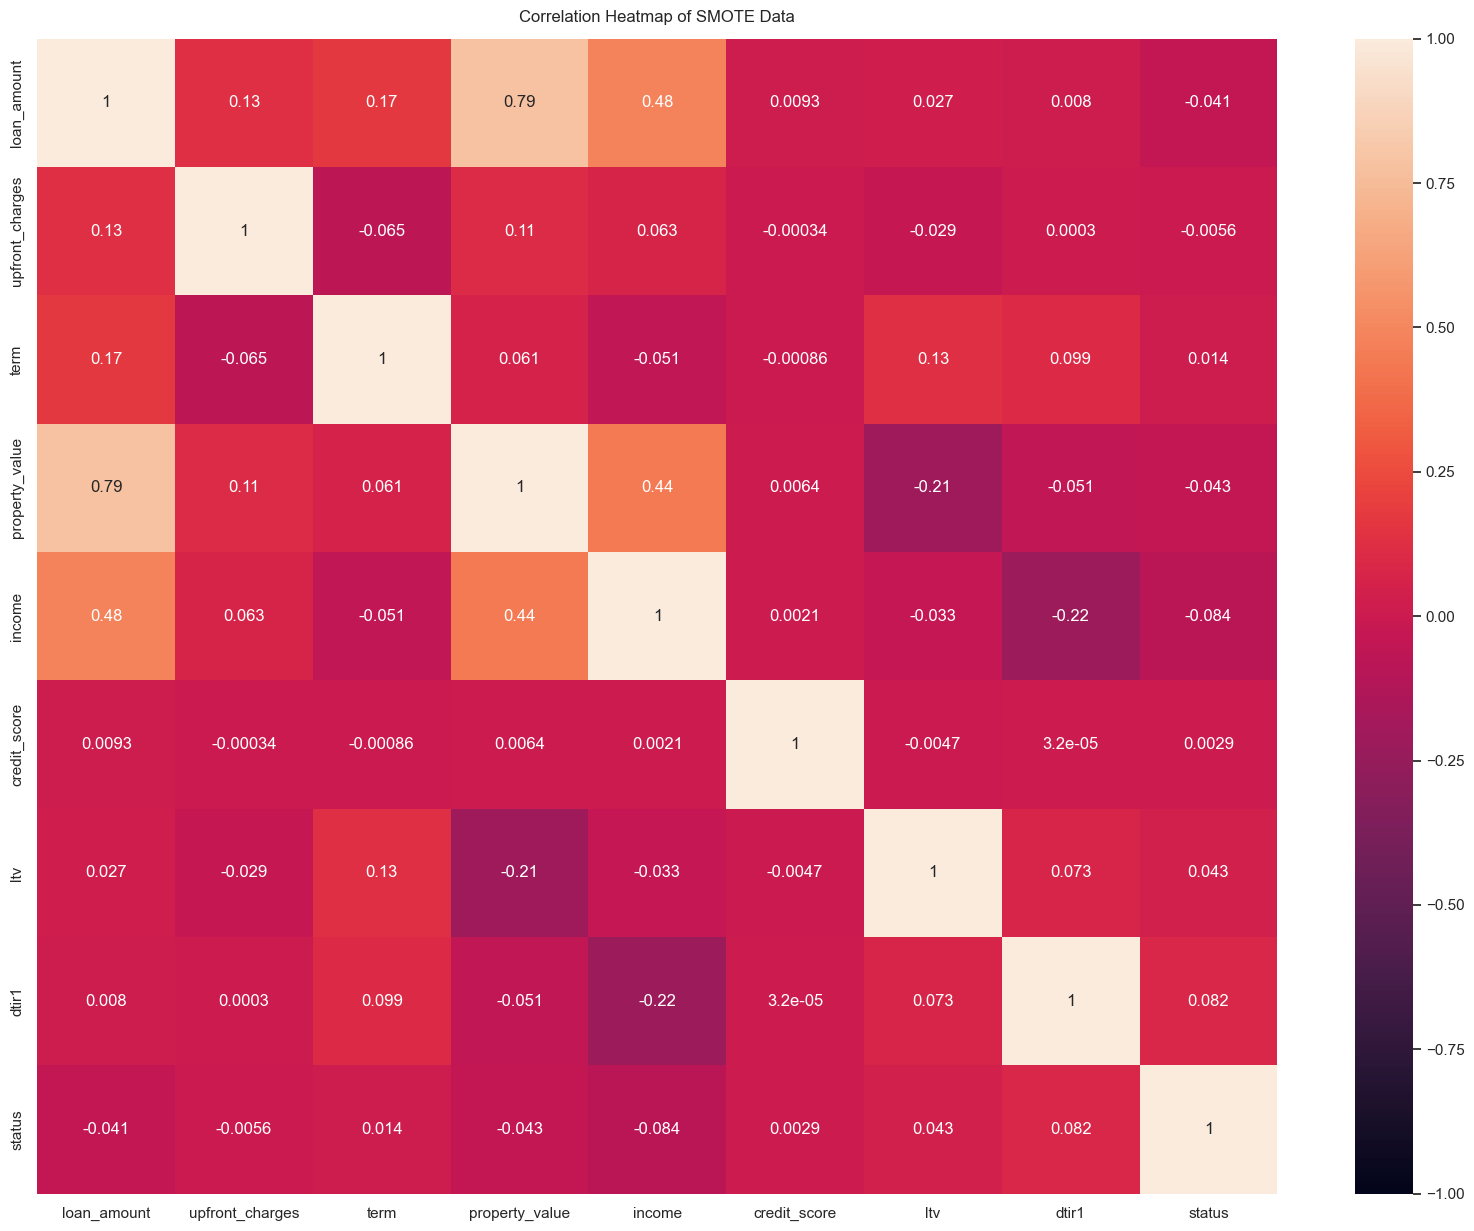

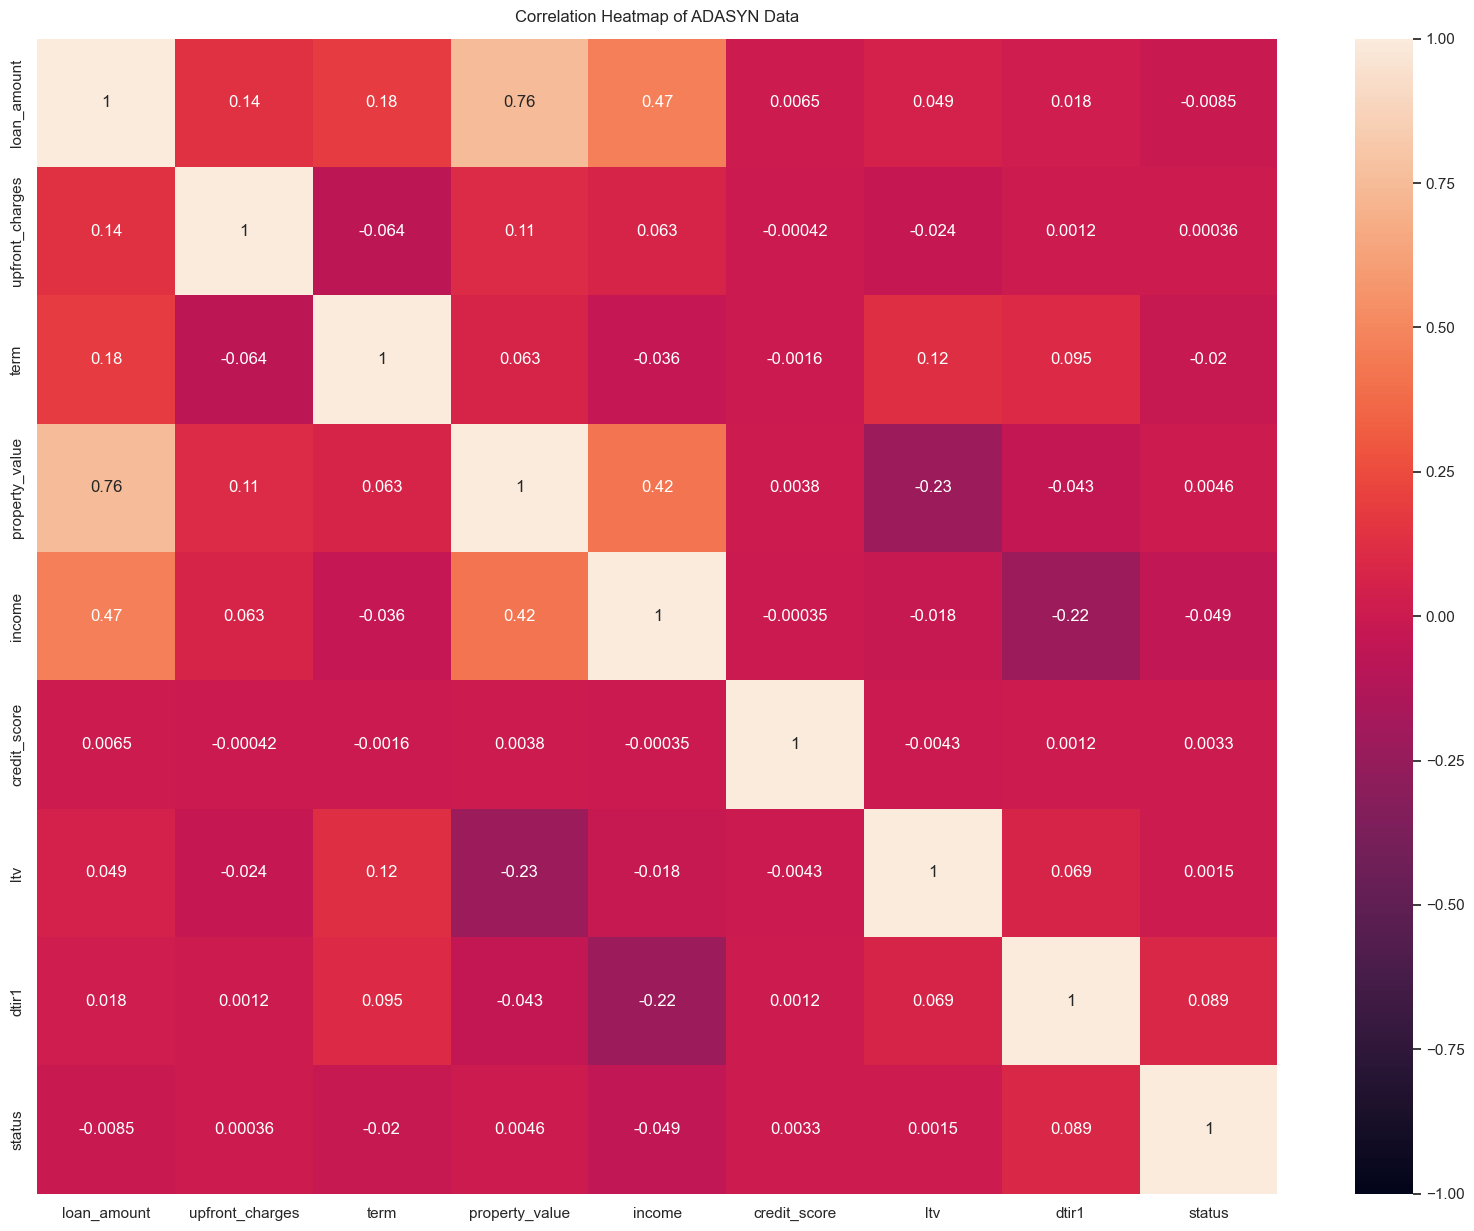

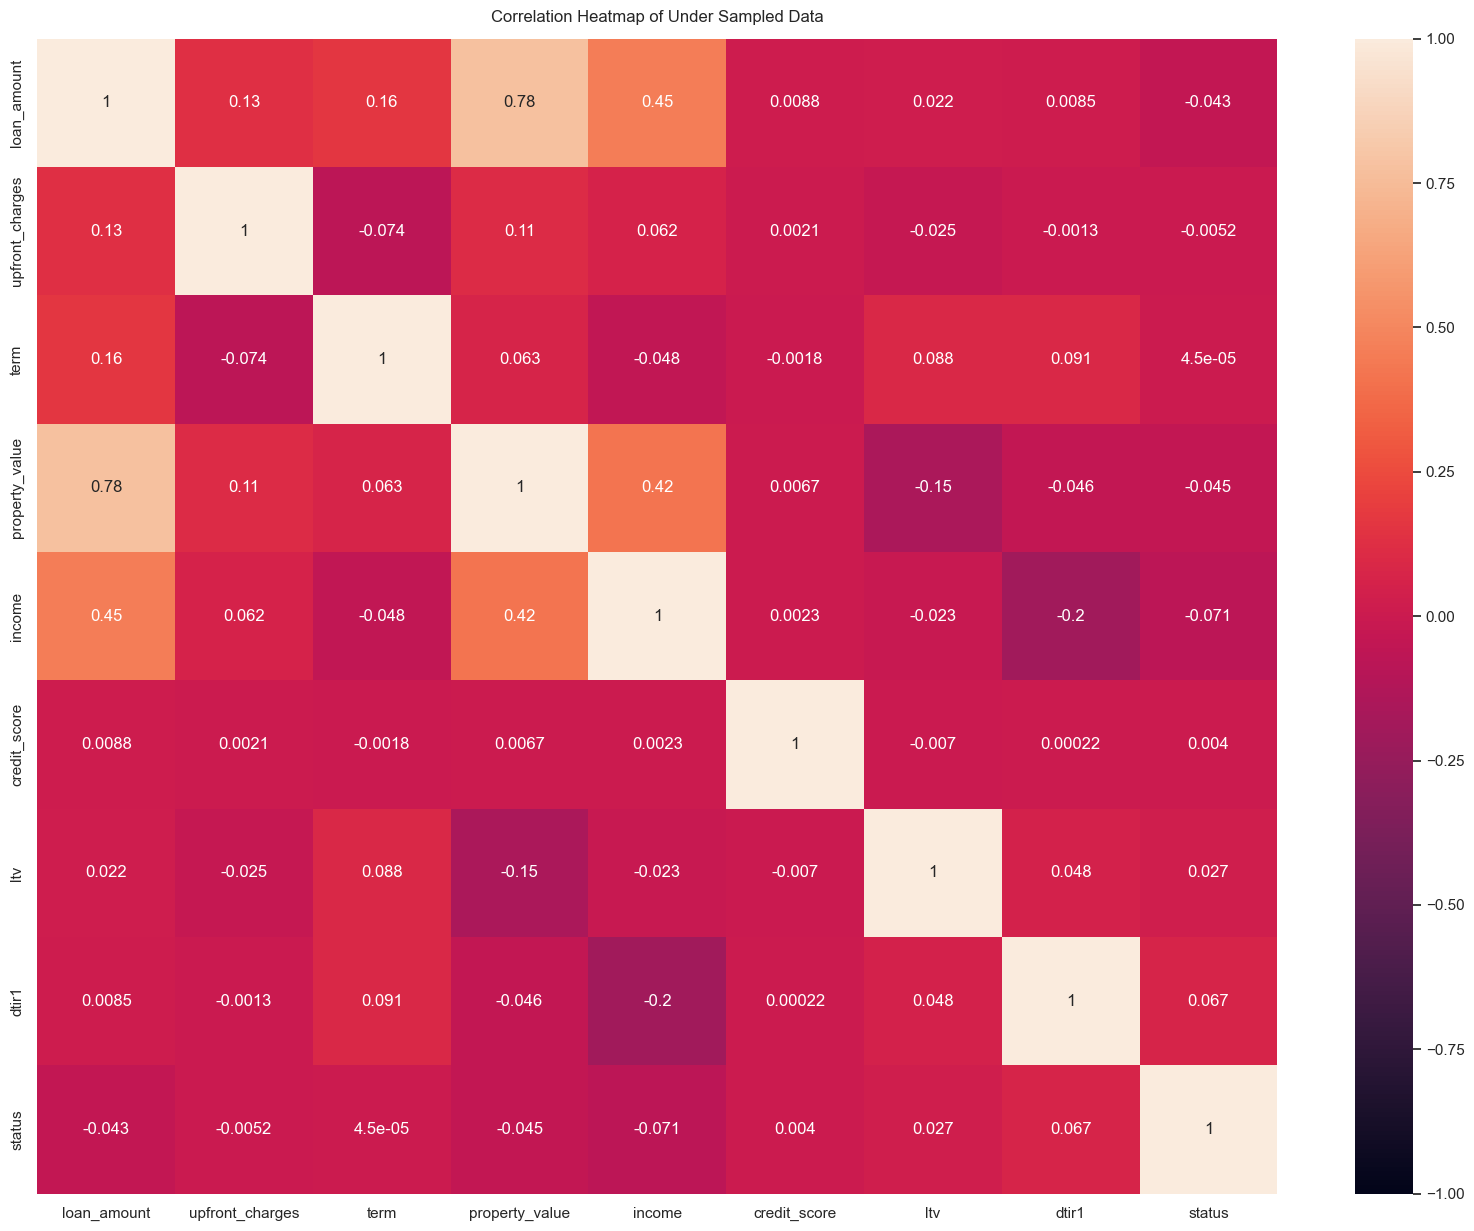

In [158]:
for i, title in enumerate(titles):
    corr = df_sets[i%4].drop(columns=["age"],axis=1).corr()
    plt.figure(figsize=(20, 15))
    heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap of {}'.format(title), fontdict={'fontsize':12}, pad=12)

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">4. Scaling, Categorical Variables, and Splitting</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>
## 4.1 Splitting
Split the data into training and testing sets to avoid data leakage:

- **Train/Test Split:** Usually a 70/30 or 80/20 split.
- **Stratified Sampling:** If the dataset is imbalanced, ensure stratified sampling of the target variable.

In [159]:
# datas = [i : [j : None for j in ['X_train','X_test','y_train','y_test']]for i in titles]
datas = [[[None for i in range(4)] for j in range(3)] for j in range(4)]
Xs = [X,X_smote,X_adasyn,X_under]
ys = [y,y_smote,y_adasyn,y_under]
for index,i in enumerate(df_sets):
    X_train, X_test, y_train, y_test = train_test_split(Xs[index], ys[index], test_size=0.3, stratify=ys[index], random_state=1)
    datas[index][0][0]=X_train
    datas[index][0][1]=X_test
    for j in range(3):
        datas[index][j][2]=y_train
        datas[index][j][3]=y_test


## 4.2 Encoding Categorical Variables
Handle categorical features:

- **Label Encoding:** For ordinal variables.
- **One-Hot Encoding:** For nominal variables.

In [160]:
for i in range(4):
    datas[i][0][0] = pd.concat([datas[i][0][0].drop(columns=["age"],axis=1),pd.get_dummies(datas[i][0][0]['age'], drop_first=False)], axis=1)
    datas[i][0][0].columns = datas[i][0][0].columns.astype(str).str.lower()
    datas[i][0][1] = pd.concat([datas[i][0][1].drop(columns=["age"],axis=1),pd.get_dummies(datas[i][0][1]['age'], drop_first=False)], axis=1)
    datas[i][0][1].columns = datas[i][0][1].columns.astype(str).str.lower()


## 4.3 Scaling
Normalize or standardize features to improve model performance, especially for distance-based algorithms (e.g., k-NN, SVM):

In [161]:
scalers = {"standart": [], "minmax": []}
for index,i in enumerate(datas):
    minmax = MinMaxScaler()
    standart = StandardScaler()
    
    i[1][0] = minmax.fit_transform(i[0][0])
    i[1][1] = minmax.transform(i[0][1])
    i[2][0] = standart.fit_transform(i[0][0])
    i[2][1] = standart.transform(i[0][1])
    scalers["minmax"].append(minmax)
    scalers["standart"].append(standart)
       

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">5. Models</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 5.1 Creating Models and Fine-Tuning
Build and evaluate baseline models using different machine learning algorithms. Improve model performance by tuning hyperparameters:

In [162]:
# Datas[Scaling Method][Scaler][X-Y Train-Test]


In [163]:
model_names = ["KNN","Decision Tree","Random Forest","Logistic Regression","MLP","XGBoost","LightGBM","CatBoost"]
Scaling = ["No Scaling","MinMax","Standart"]
results = {l:{i:{j:{k:None for k in ["Test","Train"]} for j in Scaling} for i in titles} for l in model_names}

In [164]:
def call_model(model_name):
    if model_name == "KNN":
        return KNeighborsClassifier()
    elif model_name == "Decision Tree":
        return DecisionTreeClassifier()
    elif model_name == "Random Forest":
        return RandomForestClassifier()
    elif model_name == "Logistic Regression":
        return LogisticRegression()
    elif model_name == "MLP":
        return MLPClassifier()
    elif model_name == "XGBoost":
        return XGBClassifier()
    elif model_name == "LightGBM":
        return LGBMClassifier()
    elif model_name == "CatBoost":
        return CatBoostClassifier()

In [167]:
trained_models = []
for index_m in model_names:
    for index,data in enumerate(datas):
        for index_s, scaled_data in enumerate(data):
            model = call_model(index_m)
            print(f"{index_m} - {titles[index]} - {Scaling[index_s]}")
            model.fit(scaled_data[0], scaled_data[2])
            results[index_m][titles[index]][Scaling[index_s]]["Train"] = model.score(scaled_data[0], scaled_data[2])
            predictions = model.predict(scaled_data[1])
            results[index_m][titles[index]][Scaling[index_s]]["Test"] = {
                "Accuracy": accuracy_score(scaled_data[3], predictions),
                "Precision": precision_score(scaled_data[3], predictions),
                "Recall": recall_score(scaled_data[3], predictions),
                "F1": f1_score(scaled_data[3], predictions),
                "Confusion Matrix": confusion_matrix(scaled_data[3], predictions)
            }
            print(results[index_m][titles[index]][Scaling[index_s]]["Test"])
            trained_models.append(model)
            print(f"{index_m} - {titles[index]} - {Scaling[index_s]} - {accuracy_score(scaled_data[3], predictions)}")

KNN - Regular Data - No Scaling
{'Accuracy': 0.8606757696015784, 'Precision': 0.7495821145006268, 'Recall': 0.6527474526928675, 'F1': 0.6978214355183816, 'Confusion Matrix': array([[31212,  2397],
       [ 3817,  7175]], dtype=int64)}
KNN - Regular Data - No Scaling - 0.8606757696015784
KNN - Regular Data - MinMax
{'Accuracy': 0.8172910921279792, 'Precision': 0.630592558566835, 'Recall': 0.6244541484716157, 'F1': 0.6275083420944371, 'Confusion Matrix': array([[29588,  4021],
       [ 4128,  6864]], dtype=int64)}
KNN - Regular Data - MinMax - 0.8172910921279792
KNN - Regular Data - Standart
{'Accuracy': 0.8556758817066882, 'Precision': 0.705978113412318, 'Recall': 0.7101528384279476, 'F1': 0.7080593224182503, 'Confusion Matrix': array([[30358,  3251],
       [ 3186,  7806]], dtype=int64)}
KNN - Regular Data - Standart - 0.8556758817066882
KNN - SMOTE Data - No Scaling
{'Accuracy': 0.8596378999985124, 'Precision': 0.8281525722817972, 'Recall': 0.9076167807200238, 'F1': 0.8660657250337143

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.7535257057016659, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'Confusion Matrix': array([[33608,     1],
       [10992,     0]], dtype=int64)}
Logistic Regression - Regular Data - No Scaling - 0.7535257057016659
Logistic Regression - Regular Data - MinMax
{'Accuracy': 0.7535257057016659, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'Confusion Matrix': array([[33608,     1],
       [10992,     0]], dtype=int64)}
Logistic Regression - Regular Data - MinMax - 0.7535257057016659
Logistic Regression - Regular Data - Standart
{'Accuracy': 0.753660231833367, 'Precision': 0.6190476190476191, 'Recall': 0.0011826783114992723, 'F1': 0.002360846272586943, 'Confusion Matrix': array([[33601,     8],
       [10979,    13]], dtype=int64)}
Logistic Regression - Regular Data - Standart - 0.753660231833367
Logistic Regression - SMOTE Data - No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.5619839628676416, 'Precision': 0.5497385948578386, 'Recall': 0.6851532282058911, 'F1': 0.6100213247857588, 'Confusion Matrix': array([[14748, 18861],
       [10582, 23028]], dtype=int64)}
Logistic Regression - SMOTE Data - No Scaling - 0.5619839628676416
Logistic Regression - SMOTE Data - MinMax
{'Accuracy': 0.5781698626876329, 'Precision': 0.5696524666648994, 'Recall': 0.6393632847366855, 'F1': 0.6024981425146847, 'Confusion Matrix': array([[17375, 16234],
       [12121, 21489]], dtype=int64)}
Logistic Regression - SMOTE Data - MinMax - 0.5781698626876329
Logistic Regression - SMOTE Data - Standart
{'Accuracy': 0.5865305940284741, 'Precision': 0.579222618690927, 'Recall': 0.6326986016066647, 'F1': 0.6047807971787325, 'Confusion Matrix': array([[18161, 15448],
       [12345, 21265]], dtype=int64)}
Logistic Regression - SMOTE Data - Standart - 0.5865305940284741
Logistic Regression - ADASYN Data - No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.5423667948468571, 'Precision': 0.5414090695120037, 'Recall': 0.5192631832410306, 'F1': 0.5301049332452488, 'Confusion Matrix': array([[18996, 14613],
       [15972, 17252]], dtype=int64)}
Logistic Regression - ADASYN Data - No Scaling - 0.5423667948468571
Logistic Regression - ADASYN Data - MinMax
{'Accuracy': 0.5749255607259887, 'Precision': 0.5688506305945605, 'Recall': 0.5986937153864677, 'F1': 0.5833907700429676, 'Confusion Matrix': array([[18533, 15076],
       [13333, 19891]], dtype=int64)}
Logistic Regression - ADASYN Data - MinMax - 0.5749255607259887
Logistic Regression - ADASYN Data - Standart
{'Accuracy': 0.5767360435712896, 'Precision': 0.5700261037339689, 'Recall': 0.6046833614254755, 'F1': 0.5868434889291347, 'Confusion Matrix': array([[18455, 15154],
       [13134, 20090]], dtype=int64)}
Logistic Regression - ADASYN Data - Standart - 0.5767360435712896
Logistic Regression - Under Sampled Data - No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.5708697234352256, 'Precision': 0.5590688504701243, 'Recall': 0.6707605531295487, 'F1': 0.6098428453267163, 'Confusion Matrix': array([[5177, 5815],
       [3619, 7373]], dtype=int64)}
Logistic Regression - Under Sampled Data - No Scaling - 0.5708697234352256
Logistic Regression - Under Sampled Data - MinMax
{'Accuracy': 0.5458970160116449, 'Precision': 0.5436683112611443, 'Recall': 0.57141557496361, 'F1': 0.5571967176757596, 'Confusion Matrix': array([[5720, 5272],
       [4711, 6281]], dtype=int64)}
Logistic Regression - Under Sampled Data - MinMax - 0.5458970160116449
Logistic Regression - Under Sampled Data - Standart
{'Accuracy': 0.5632278020378457, 'Precision': 0.5598518773682397, 'Recall': 0.5914301310043668, 'F1': 0.5752079278003893, 'Confusion Matrix': array([[5881, 5111],
       [4491, 6501]], dtype=int64)}
Logistic Regression - Under Sampled Data - Standart - 0.5632278020378457
MLP - Regular Data - No Scaling
{'Accuracy': 0.7699827358130984, 'Precision': 0.5181

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.9056747606555907, 'Precision': 0.7873295502667909, 'Recall': 0.8457059679767104, 'F1': 0.815474362910654, 'Confusion Matrix': array([[31098,  2511],
       [ 1696,  9296]], dtype=int64)}
MLP - Regular Data - MinMax - 0.9056747606555907
MLP - Regular Data - Standart


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.9181856909037914, 'Precision': 0.8087110064743968, 'Recall': 0.875, 'F1': 0.8405505789818658, 'Confusion Matrix': array([[31334,  2275],
       [ 1374,  9618]], dtype=int64)}
MLP - Regular Data - Standart - 0.9181856909037914
MLP - SMOTE Data - No Scaling
{'Accuracy': 0.8224906648417858, 'Precision': 0.8713512402357133, 'Recall': 0.7567093127045522, 'F1': 0.8099939488518743, 'Confusion Matrix': array([[29854,  3755],
       [ 8177, 25433]], dtype=int64)}
MLP - SMOTE Data - No Scaling - 0.8224906648417858
MLP - SMOTE Data - MinMax


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.9185498147845104, 'Precision': 0.8829037262854188, 'Recall': 0.9650996727164535, 'F1': 0.9221737338128474, 'Confusion Matrix': array([[29307,  4302],
       [ 1173, 32437]], dtype=int64)}
MLP - SMOTE Data - MinMax - 0.9185498147845104
MLP - SMOTE Data - Standart
{'Accuracy': 0.9326678468885286, 'Precision': 0.9079560118947427, 'Recall': 0.9629574531389468, 'F1': 0.9346482615224674, 'Confusion Matrix': array([[30328,  3281],
       [ 1245, 32365]], dtype=int64)}
MLP - SMOTE Data - Standart - 0.9326678468885286
MLP - ADASYN Data - No Scaling
{'Accuracy': 0.8326575194888752, 'Precision': 0.7975161987041036, 'Recall': 0.8891163014688177, 'F1': 0.8408288739610611, 'Confusion Matrix': array([[26109,  7500],
       [ 3684, 29540]], dtype=int64)}
MLP - ADASYN Data - No Scaling - 0.8326575194888752
MLP - ADASYN Data - MinMax


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.911570631274969, 'Precision': 0.865062817428495, 'Recall': 0.9740549000722369, 'F1': 0.9163292465384942, 'Confusion Matrix': array([[28561,  5048],
       [  862, 32362]], dtype=int64)}
MLP - ADASYN Data - MinMax - 0.911570631274969
MLP - ADASYN Data - Standart
{'Accuracy': 0.928553259617255, 'Precision': 0.8953776023570614, 'Recall': 0.9695701902239345, 'F1': 0.9309981069637722, 'Confusion Matrix': array([[29845,  3764],
       [ 1011, 32213]], dtype=int64)}
MLP - ADASYN Data - Standart - 0.928553259617255
MLP - Under Sampled Data - No Scaling
{'Accuracy': 0.5505822416302766, 'Precision': 0.913075780089153, 'Recall': 0.11180858806404657, 'F1': 0.19922191603177175, 'Confusion Matrix': array([[10875,   117],
       [ 9763,  1229]], dtype=int64)}
MLP - Under Sampled Data - No Scaling - 0.5505822416302766
MLP - Under Sampled Data - MinMax


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.8979257641921398, 'Precision': 0.8579378068739771, 'Recall': 0.9537845705967977, 'F1': 0.9033258659314148, 'Confusion Matrix': array([[ 9256,  1736],
       [  508, 10484]], dtype=int64)}
MLP - Under Sampled Data - MinMax - 0.8979257641921398
MLP - Under Sampled Data - Standart


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.9206240902474527, 'Precision': 0.8906632868610055, 'Recall': 0.9589701601164483, 'F1': 0.9235554387348316, 'Confusion Matrix': array([[ 9698,  1294],
       [  451, 10541]], dtype=int64)}
MLP - Under Sampled Data - Standart - 0.9206240902474527
XGBoost - Regular Data - No Scaling
{'Accuracy': 0.9604717383018317, 'Precision': 0.8952462526766596, 'Recall': 0.9508733624454149, 'F1': 0.9222217320333524, 'Confusion Matrix': array([[32386,  1223],
       [  540, 10452]], dtype=int64)}
XGBoost - Regular Data - No Scaling - 0.9604717383018317
XGBoost - Regular Data - MinMax
{'Accuracy': 0.9604717383018317, 'Precision': 0.8952462526766596, 'Recall': 0.9508733624454149, 'F1': 0.9222217320333524, 'Confusion Matrix': array([[32386,  1223],
       [  540, 10452]], dtype=int64)}
XGBoost - Regular Data - MinMax - 0.9604717383018317
XGBoost - Regular Data - Standart
{'Accuracy': 0.9604717383018317, 'Precision': 0.8952462526766596, 'Recall': 0.9508733624454149, 'F1': 0.9222217320333524, 

In [169]:
results_2 = results.copy()
results_2

{'KNN': {'Regular Data': {'No Scaling': {'Test': {'Accuracy': 0.8606757696015784,
     'Precision': 0.7495821145006268,
     'Recall': 0.6527474526928675,
     'F1': 0.6978214355183816,
     'Confusion Matrix': array([[31212,  2397],
            [ 3817,  7175]], dtype=int64)},
    'Train': 0.9031604031940347},
   'MinMax': {'Test': {'Accuracy': 0.8172910921279792,
     'Precision': 0.630592558566835,
     'Recall': 0.6244541484716157,
     'F1': 0.6275083420944371,
     'Confusion Matrix': array([[29588,  4021],
            [ 4128,  6864]], dtype=int64)},
    'Train': 0.8799834725038196},
   'Standart': {'Test': {'Accuracy': 0.8556758817066882,
     'Precision': 0.705978113412318,
     'Recall': 0.7101528384279476,
     'F1': 0.7080593224182503,
     'Confusion Matrix': array([[30358,  3251],
            [ 3186,  7806]], dtype=int64)},
    'Train': 0.9044576194640095}},
  'SMOTE Data': {'No Scaling': {'Test': {'Accuracy': 0.8596378999985124,
     'Precision': 0.8281525722817972,
     '

In [170]:
import pickle

for model_name in model_names:
    for title in titles:
        for scaling in Scaling:
            with open(f"{model_name}_{title}_{scaling}.pkl", 'wb') as file:
                pickle.dump(results[model_name][title][scaling], file)


## 5.2 Model Comparisons
Compare the performance of different models.

In [171]:
test_accuracies = []

for model_name, preprocess_dict in results.items():
    for preprocess, scaling_dict in preprocess_dict.items():
        for scaling, metrics in scaling_dict.items():
            test_metrics = metrics.get("Test", None)
            if test_metrics and "Accuracy" in test_metrics:
                test_accuracies.append({
                    "Model": model_name,
                    "Preprocessing": preprocess,
                    "Scaling": scaling,
                    "Accuracy": test_metrics["Accuracy"]
                })

sorted_accuracies = sorted(test_accuracies, key=lambda x: x["Accuracy"], reverse=True)

for entry in sorted_accuracies:
    print(f"Model: {entry['Model']}, Preprocessing: {entry['Preprocessing']}, Scaling: {entry['Scaling']}, Accuracy: {entry['Accuracy']:.2f}")


Model: CatBoost, Preprocessing: SMOTE Data, Scaling: Standart, Accuracy: 0.97
Model: CatBoost, Preprocessing: SMOTE Data, Scaling: No Scaling, Accuracy: 0.97
Model: CatBoost, Preprocessing: SMOTE Data, Scaling: MinMax, Accuracy: 0.97
Model: CatBoost, Preprocessing: ADASYN Data, Scaling: Standart, Accuracy: 0.97
Model: CatBoost, Preprocessing: ADASYN Data, Scaling: No Scaling, Accuracy: 0.97
Model: CatBoost, Preprocessing: ADASYN Data, Scaling: MinMax, Accuracy: 0.97
Model: XGBoost, Preprocessing: SMOTE Data, Scaling: No Scaling, Accuracy: 0.97
Model: XGBoost, Preprocessing: SMOTE Data, Scaling: MinMax, Accuracy: 0.97
Model: XGBoost, Preprocessing: SMOTE Data, Scaling: Standart, Accuracy: 0.97
Model: XGBoost, Preprocessing: ADASYN Data, Scaling: No Scaling, Accuracy: 0.97
Model: XGBoost, Preprocessing: ADASYN Data, Scaling: MinMax, Accuracy: 0.97
Model: XGBoost, Preprocessing: ADASYN Data, Scaling: Standart, Accuracy: 0.97
Model: CatBoost, Preprocessing: Regular Data, Scaling: No Scalin

In [172]:
results

{'KNN': {'Regular Data': {'No Scaling': {'Test': {'Accuracy': 0.8606757696015784,
     'Precision': 0.7495821145006268,
     'Recall': 0.6527474526928675,
     'F1': 0.6978214355183816,
     'Confusion Matrix': array([[31212,  2397],
            [ 3817,  7175]], dtype=int64)},
    'Train': 0.9031604031940347},
   'MinMax': {'Test': {'Accuracy': 0.8172910921279792,
     'Precision': 0.630592558566835,
     'Recall': 0.6244541484716157,
     'F1': 0.6275083420944371,
     'Confusion Matrix': array([[29588,  4021],
            [ 4128,  6864]], dtype=int64)},
    'Train': 0.8799834725038196},
   'Standart': {'Test': {'Accuracy': 0.8556758817066882,
     'Precision': 0.705978113412318,
     'Recall': 0.7101528384279476,
     'F1': 0.7080593224182503,
     'Confusion Matrix': array([[30358,  3251],
            [ 3186,  7806]], dtype=int64)},
    'Train': 0.9044576194640095}},
  'SMOTE Data': {'No Scaling': {'Test': {'Accuracy': 0.8596378999985124,
     'Precision': 0.8281525722817972,
     '

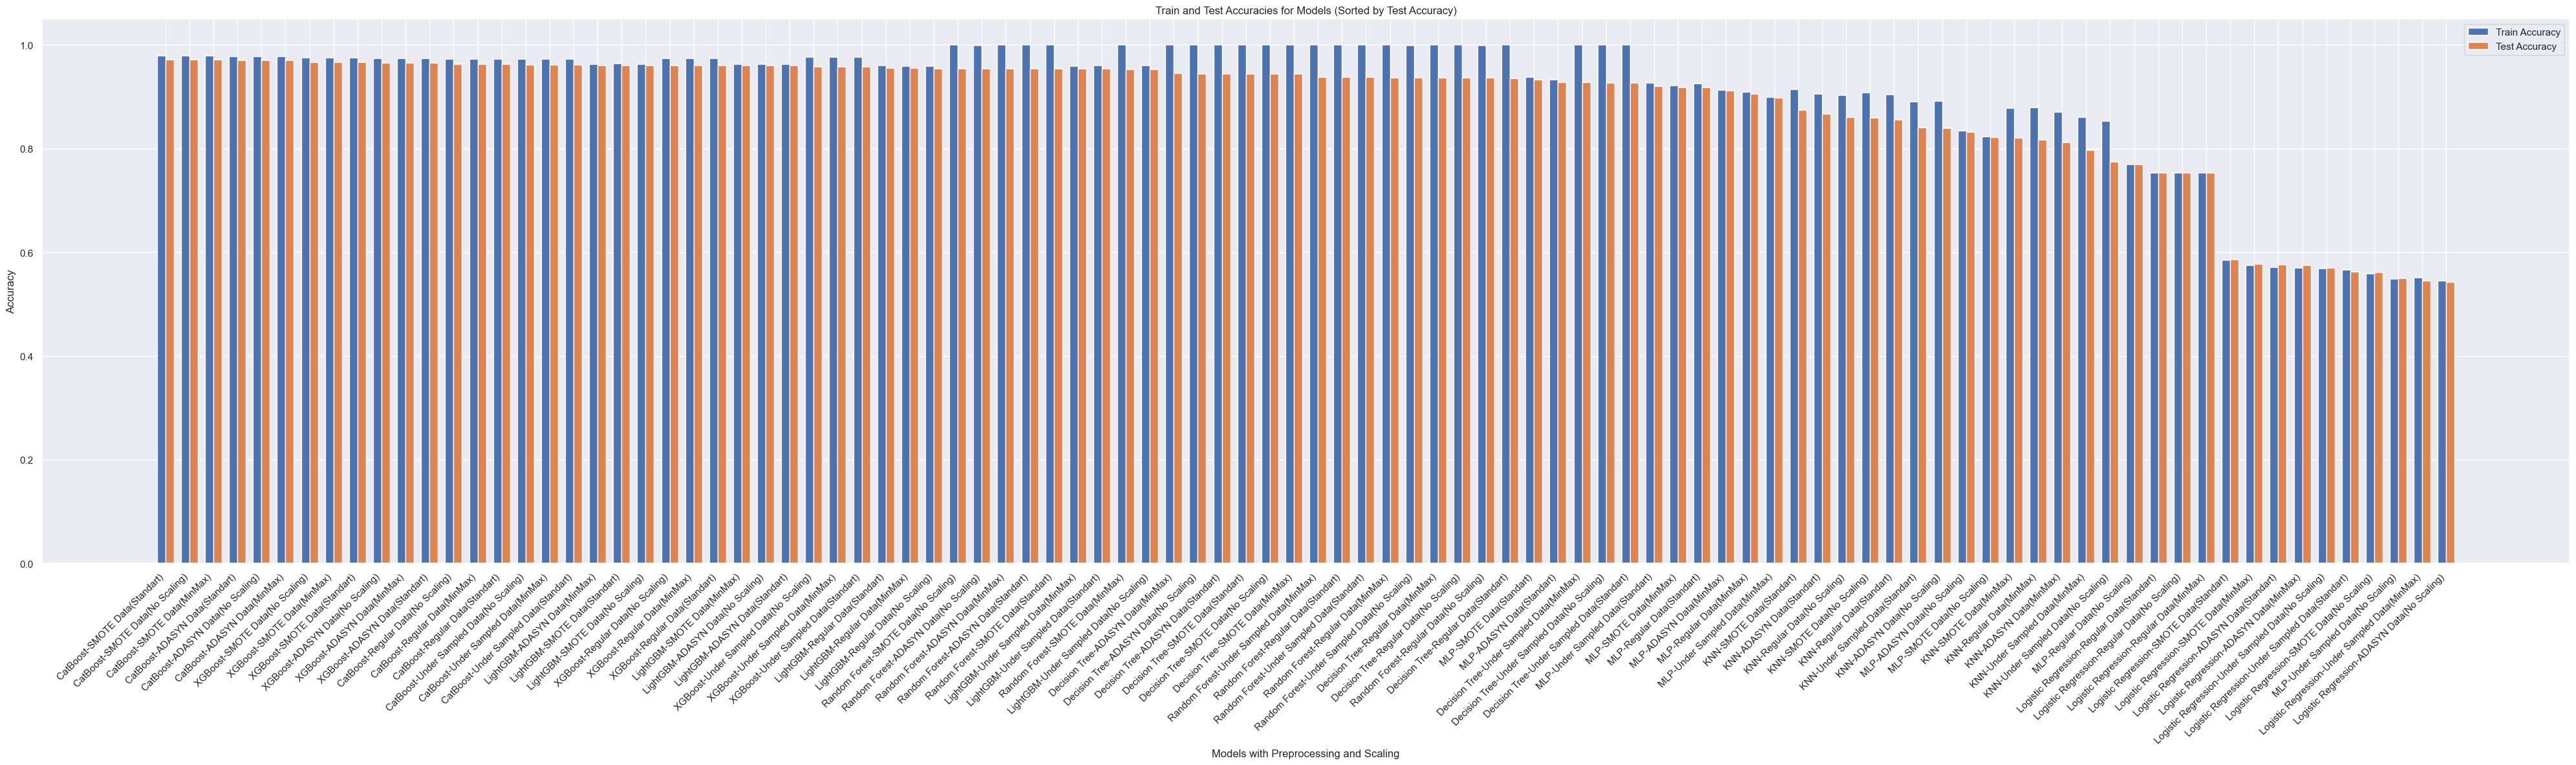

In [173]:
train_accuracies = []
test_accuracies = []
test_recalls = []
test_precisions = []
test_f1s = []
x_labels = []

for model_name, preprocess_dict in results.items():
    for preprocess, scaling_dict in preprocess_dict.items():
        for scaling, metrics in scaling_dict.items():
            train_accuracy = metrics.get("Train", None)
            test_metrics = metrics.get("Test", None)
            test_accuracy = test_metrics.get("Accuracy", None) if test_metrics else None
            test_recall = test_metrics.get("Recall", None) if test_metrics else None
            test_precision = test_metrics.get("Precision", None) if test_metrics else None
            test_f1 = test_metrics.get("F1", None) if test_metrics else None

            if train_accuracy is not None and test_accuracy is not None:
                x_labels.append(f"{model_name}-{preprocess}({scaling})")
                train_accuracies.append(train_accuracy)
                test_accuracies.append(test_accuracy)
                test_recalls.append(test_recall)
                test_precisions.append(test_precision)
                test_f1s.append(test_f1)
                
               


data = list(zip(x_labels, train_accuracies, test_accuracies))
data_sorted = sorted(data, key=lambda x: x[2], reverse=True)
x_labels_sorted, train_accuracies_sorted, test_accuracies_sorted = zip(*data_sorted)

# Plotting
x = range(len(x_labels_sorted)) 
width = 0.35 

plt.figure(figsize=(40, 12))

plt.bar([pos - width/2 for pos in x], train_accuracies_sorted, width, label='Train Accuracy')
plt.bar([pos + width/2 for pos in x], test_accuracies_sorted, width, label='Test Accuracy')

plt.xlabel("Models with Preprocessing and Scaling")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracies for Models (Sorted by Test Accuracy)")
plt.xticks(ticks=x, labels=x_labels_sorted, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

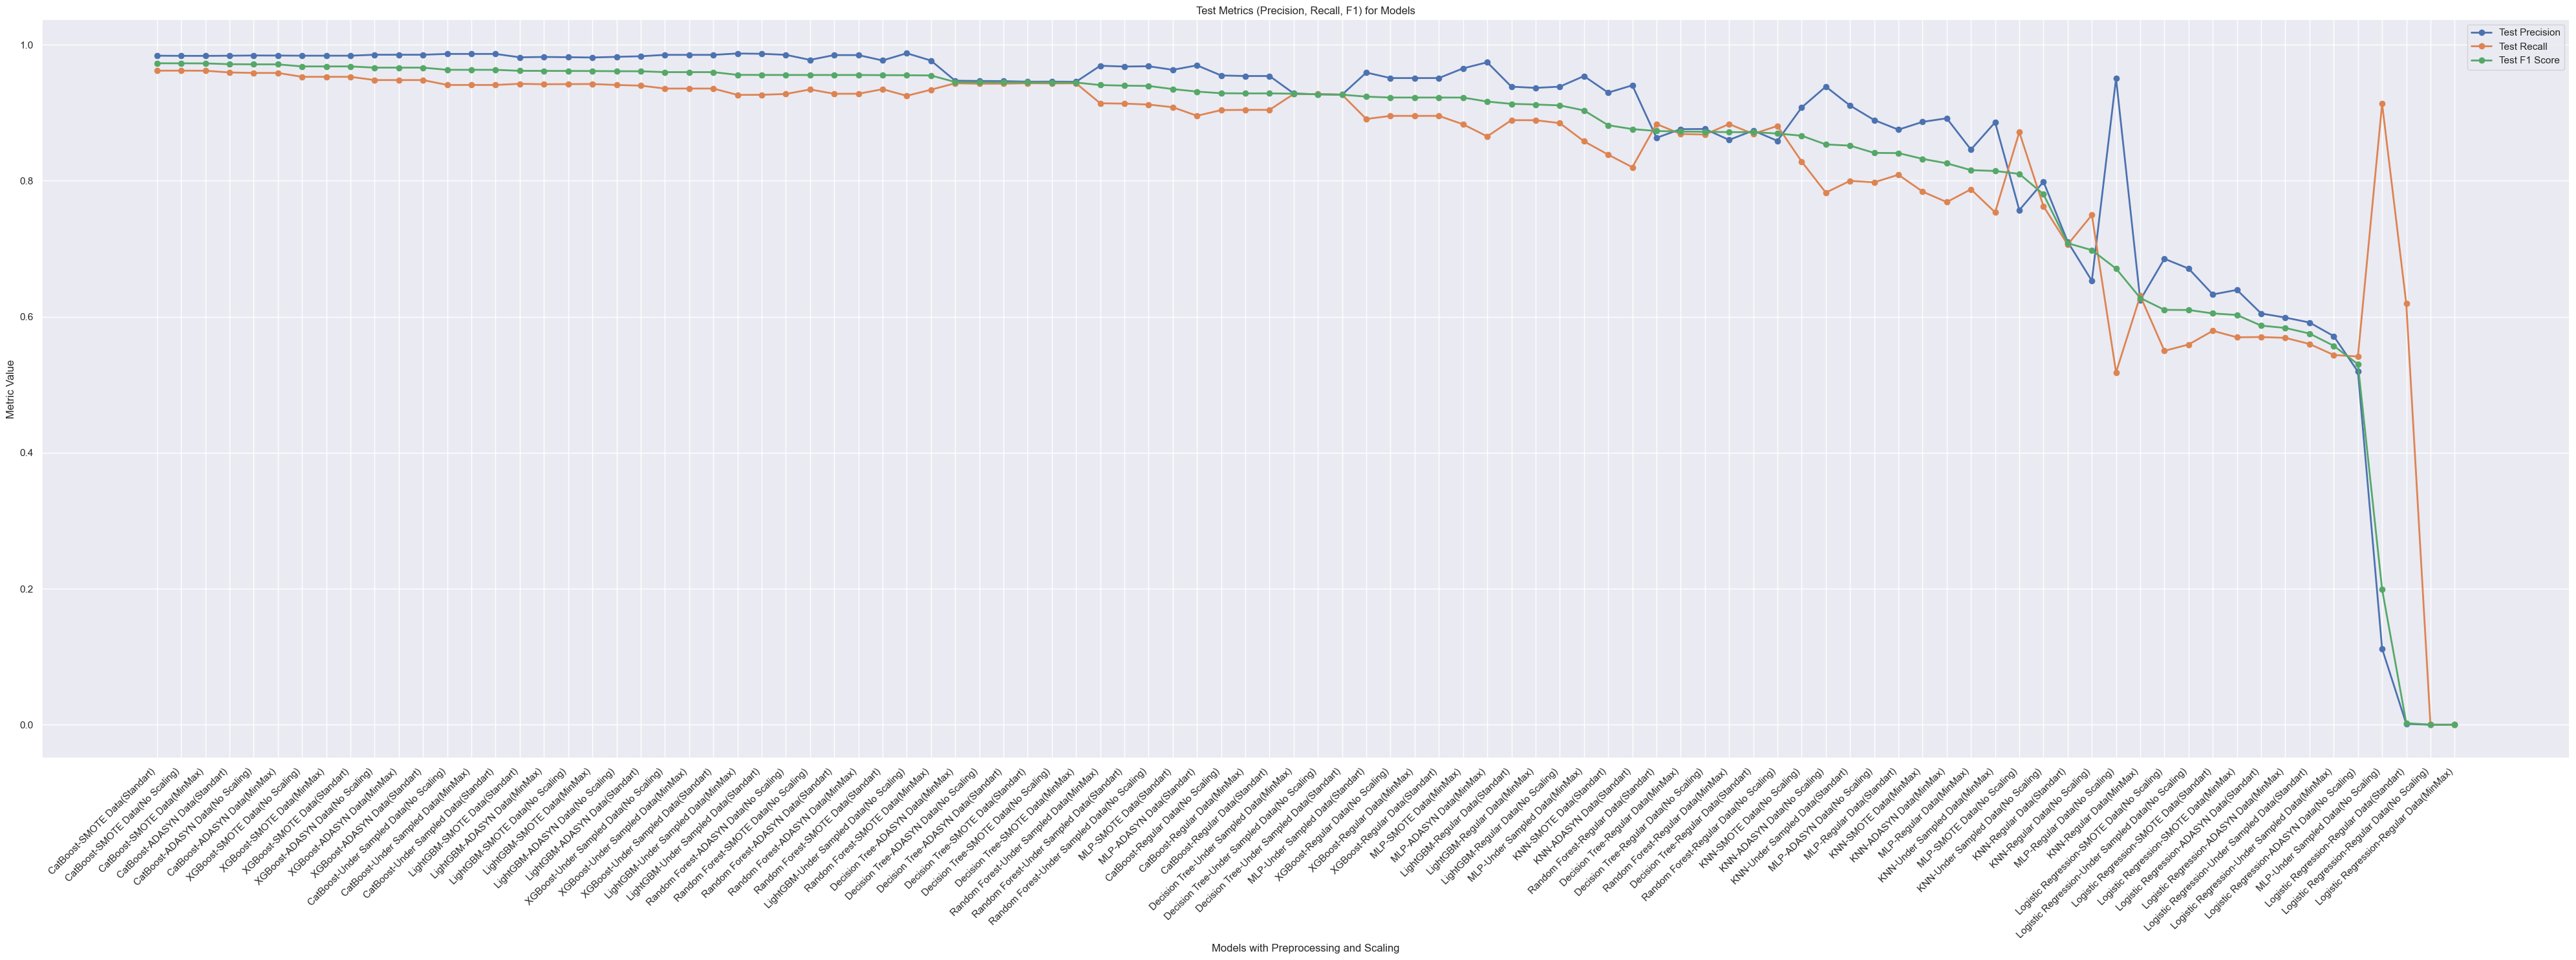

In [175]:
data = list(zip(x_labels, test_recalls, test_precisions, test_f1s))
data_sorted = sorted(data, key=lambda x: x[3], reverse=True)

x_labels_sorted, test_precisions_sorted, test_recalls_sorted, test_f1_scores_sorted = zip(*data_sorted)

x = range(len(x_labels_sorted)) 

plt.figure(figsize=(40, 15))
plt.plot(x, test_precisions_sorted, marker='o', label='Test Precision', linestyle='-', linewidth=2)
plt.plot(x, test_recalls_sorted, marker='o', label='Test Recall', linestyle='-', linewidth=2)
plt.plot(x, test_f1_scores_sorted, marker='o', label='Test F1 Score', linestyle='-', linewidth=2)

plt.xlabel("Models with Preprocessing and Scaling")
plt.ylabel("Metric Value")
plt.title("Test Metrics (Precision, Recall, F1) for Models")
plt.xticks(ticks=x, labels=x_labels_sorted, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## 5.3 Feature Importance
Analyze and explain the most important features:

## 5.4 Final Model
Choose the best-performing model based on your evaluations and fine-tuning.

## 5.5 Create a Model with Fewer Features (if necessary)

## 5.6 Pickle the Model
Save the final model for future deployment:

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">6. Conclusion</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Final Remarks
Summarize the key takeaways from the project. Highlight what was learned throughout the data science workflow and model deployment.

......